## Проект - "Промышленность"

## Описание проекта:
### Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.


### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

# План

    1. Загрузка данных
    2. Анализ данных
        2.1 Знакомство с данными. 
        2.2 Визуализация данных.
        2.3 Вывод.               
    3. Подготовка данных.
        3.1 Приведение данных и датафреймов к принятому типу и виду.    
        3.1 Удаление и заполнение пропусков.
        3.2 Удаление ненужных признаков.
        3.3 Создание новых признаков.
        3.4 Объединение датасетов.        
    4. Обучение моделей.
        4.1 Создание обучающего и тестового датасета.
        4.2 Подборка гиперпараметров для нескольких моделях на обучающей выборке.
        4.3 Выбор наилучших моделей.
        4.3 Обучение наилучших моделей на подобранных гиперпараметрах.
        4.4 Проверка моделей на тестовом датасете.
    5. Отчет. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression


In [2]:
warnings.filterwarnings("ignore")

In [3]:
random_state = 190922

## Иследование данных

In [4]:
try:
    data_arc = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_arc.csv')
    data_bulk = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_gas.csv')
    data_temp = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_temp.csv')
    data_wire = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv(r'C:/Users/dmitr/Downloads/final_steel/final_steel/data_wire_time.csv')    
except FileNotFoundError:
    data_arc = pd.read_csv('******/data_arc.csv')
    data_bulk = pd.read_csv('******/data_bulk.csv')
    data_bulk_time = pd.read_csv('******/data_bulk_time.csv')
    data_gas = pd.read_csv('******/data_gas.csv')
    data_temp = pd.read_csv('******/data_temp.csv')
    data_wire = pd.read_csv('******/data_wire.csv')
    data_wire_time = pd.read_csv('******/data_wire_time.csv')    

In [5]:
## Функция для вывода данных в табличном виде 
def data_display(data):
    display(data.info(), data.describe(), data.head())
    print('Количество дубликатов', data.duplicated().sum())
    print()
    for column in data.columns:
        print('Количество уникальных значения столбца', column, ':' ,len(data[column].unique()))
        print()
    

### DataFrame "data_arc"

In [6]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])

In [7]:
data_display(data_arc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Количество дубликатов 0

Количество уникальных значения столбца key : 3214

Количество уникальных значения столбца Начало нагрева дугой : 14875

Количество уникальных значения столбца Конец нагрева дугой : 14876

Количество уникальных значения столбца Активная мощность : 14869

Количество уникальных значения столбца Реактивная мощность : 14866



Text(0.5, 1.0, 'График оценки распределения Активной мощности')

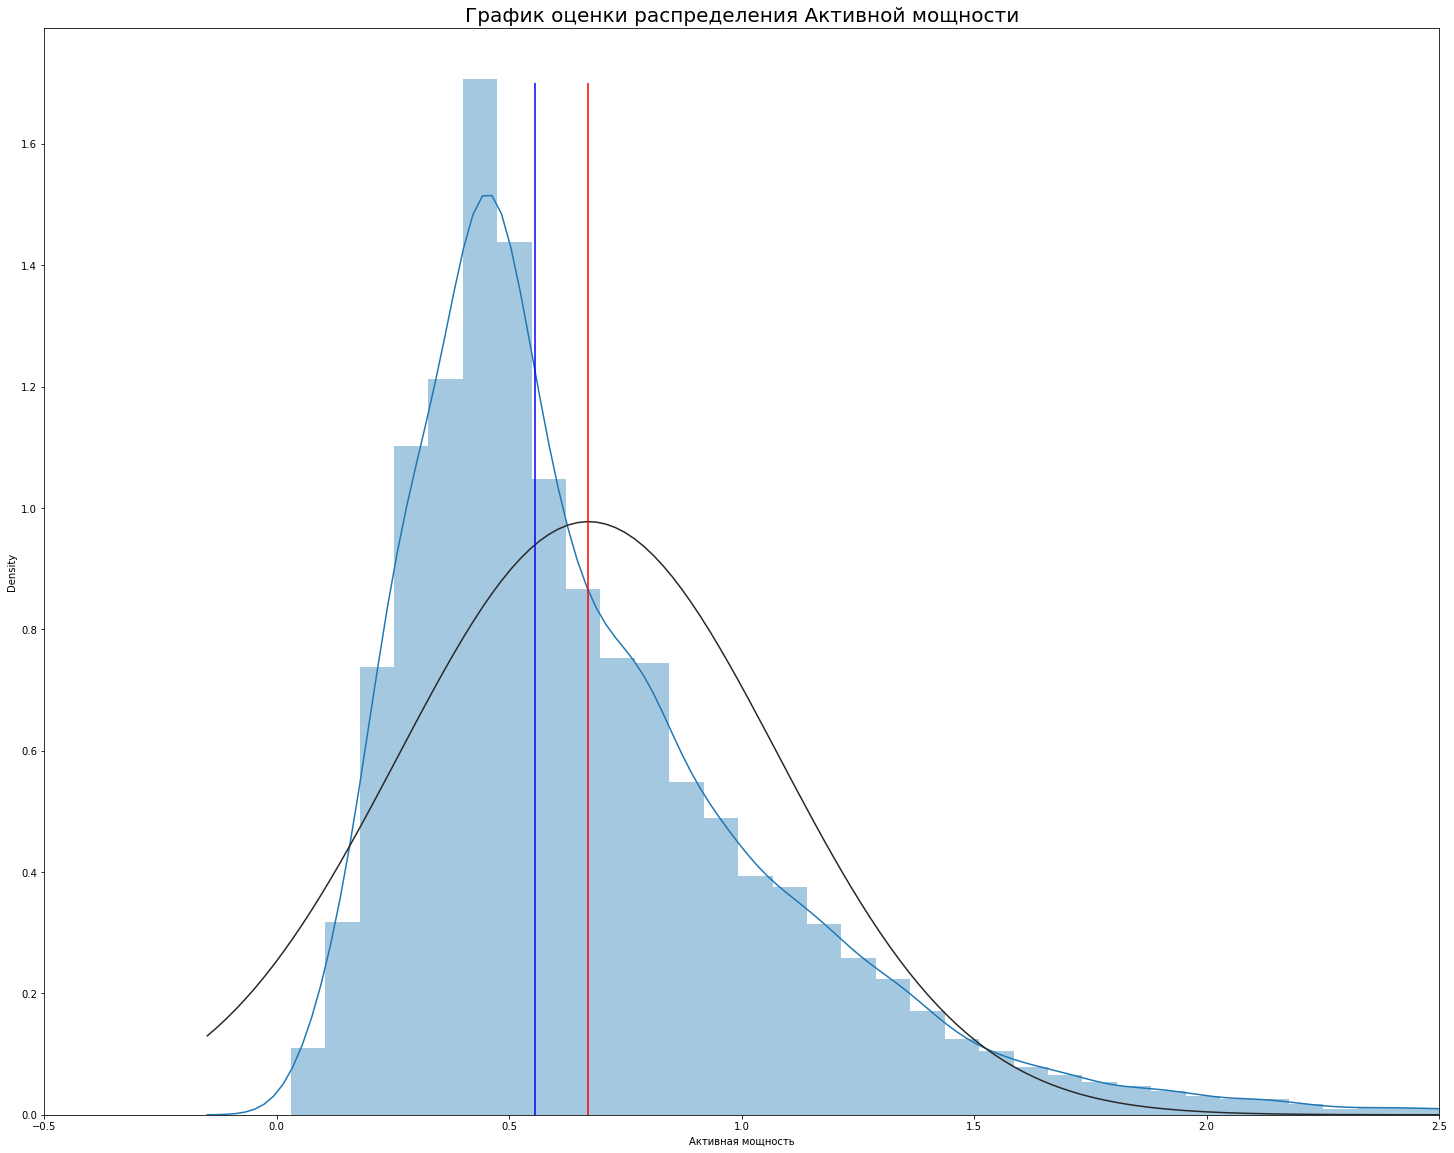

In [8]:
plt.figure(figsize=(25, 20))  
sns.distplot(data_arc['Активная мощность'], fit=sps.norm)
plt.xlim([-.5, 2.5])
plt.vlines(data_arc['Активная мощность'].mean(),0,1.7,color = 'r')
plt.vlines(data_arc['Активная мощность'].median(),0,1.7,color = 'blue')
plt.title('График оценки распределения Активной мощности', fontsize=20)

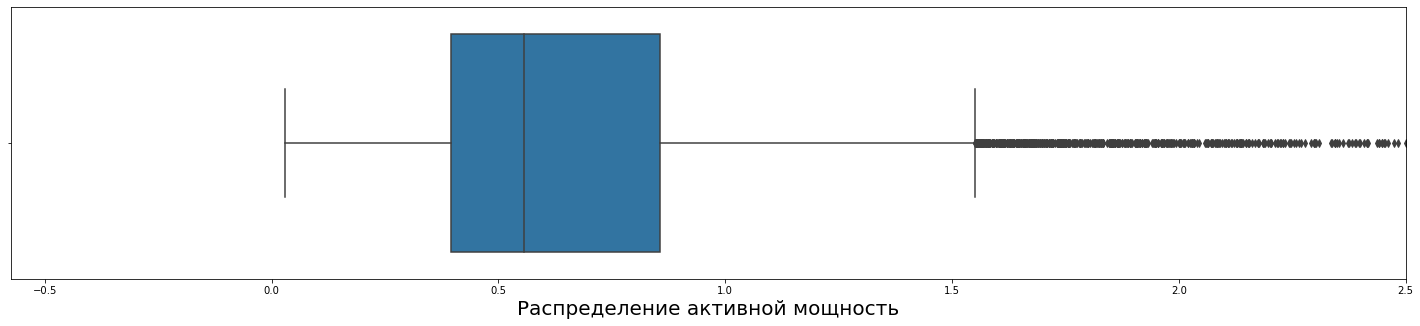

In [9]:
plt.figure(figsize=(25, 5))
sns.boxplot(data_arc['Активная мощность'])
plt.xlabel('Распределение активной мощность', fontsize=20)
plt.xlim(-0.575, 2.5)
plt.show()

Text(0.5, 1.0, 'График оценки распределения Реактивной мощности')

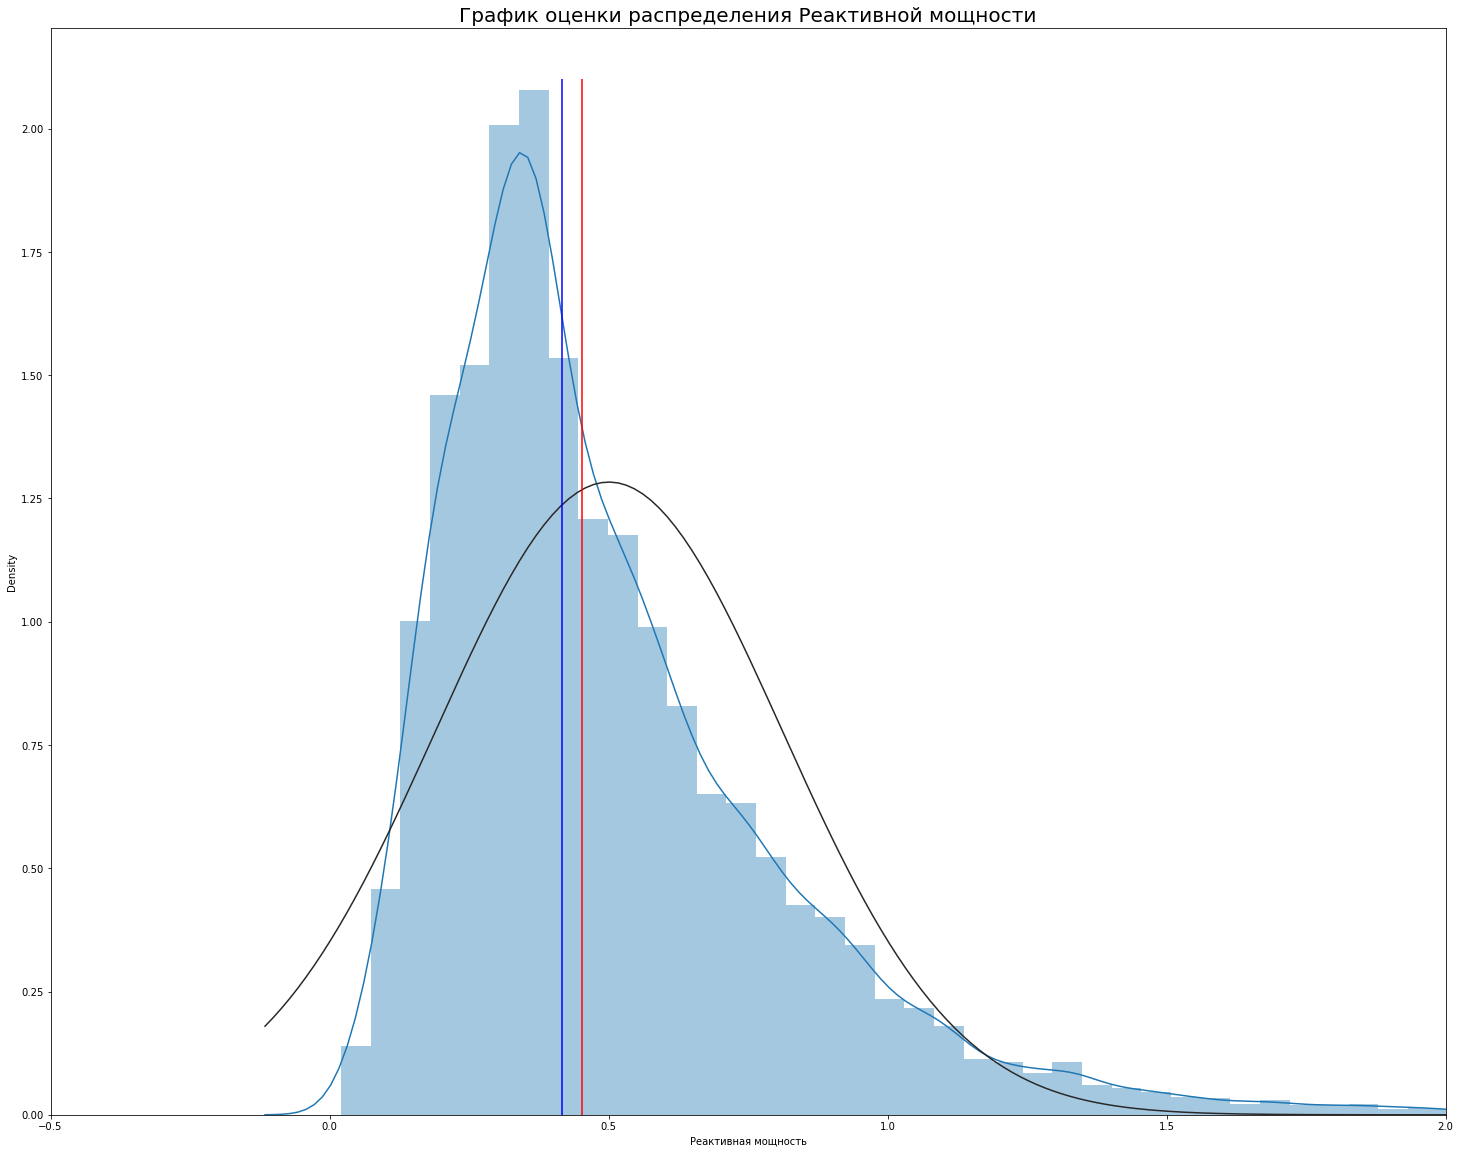

In [10]:
plt.figure(figsize=(25, 20))
sns.distplot(data_arc['Реактивная мощность'].drop(np.where(data_arc['Реактивная мощность'] < -715.0)[0]),fit=sps.norm)
plt.xlim([-0.5, 2])
plt.vlines(data_arc['Реактивная мощность'].mean(),0,2.1,color = 'r')
plt.vlines(data_arc['Реактивная мощность'].median(),0,2.1,color = 'blue')
plt.title('График оценки распределения Реактивной мощности', fontsize=20)

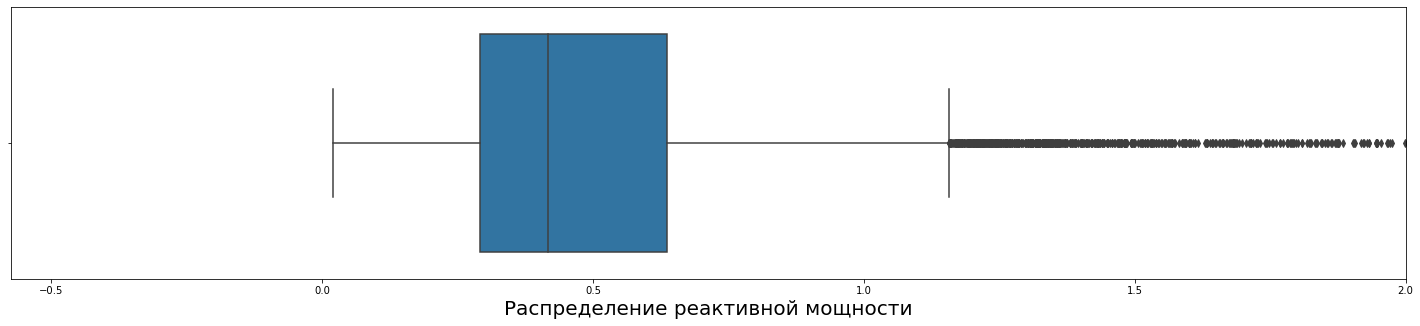

In [11]:
plt.figure(figsize=(25, 5))
sns.boxplot(data_arc['Реактивная мощность'])
plt.xlabel('Распределение реактивной мощности', fontsize=20)
plt.xlim(-0.575, 2.0)
plt.show()

In [12]:
display(data_arc['Начало нагрева дугой'].min(), data_arc['Начало нагрева дугой'].max())

Timestamp('2019-05-03 11:02:14')

Timestamp('2019-09-01 04:34:47')

In [13]:
display(data_arc['Конец нагрева дугой'].min(), data_arc['Конец нагрева дугой'].max())

Timestamp('2019-05-03 11:06:02')

Timestamp('2019-09-01 04:36:08')

In [14]:
print('Максимальная длительность нагрева: ',
      str((data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).max())[7:])

print('Минимальная длительность нагрева: ',
      str((data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).min())[7:])

Максимальная длительность нагрева:  00:15:07
Минимальная длительность нагрева:  00:00:11


Text(0.5, 1.0, 'Распределение количества операций по ключам')

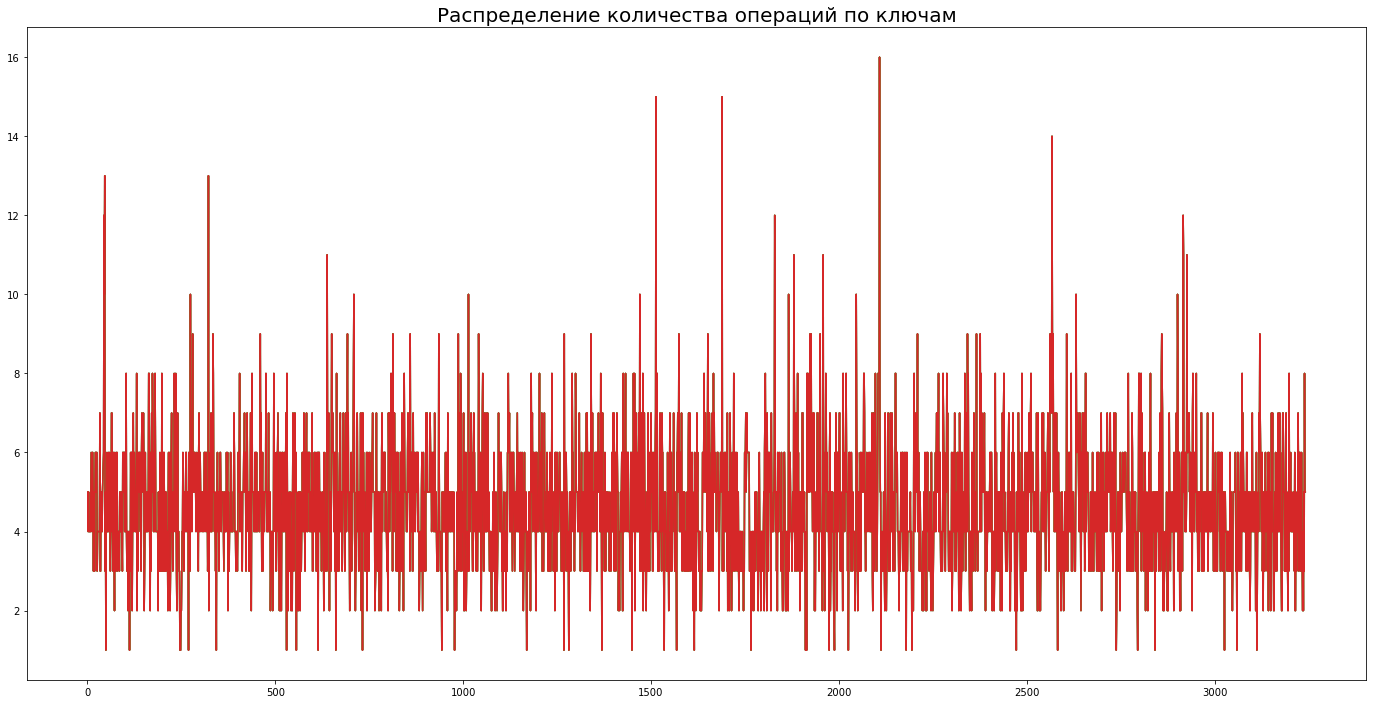

In [15]:
plt.figure(figsize=(24, 12))
plt.plot(data_arc.groupby(by='key', dropna=False).count())
plt.title('Распределение количества операций по ключам', fontsize=20)

### Вывод по DataFrame "data_arc"
    1. В данном датафрейме присутсвуют данные по номеру партии, времени начала и окончания нагрева, активной и реактивной мошности.
    2. Пропуски отсутсвуют.
    3. Есть отдельный выброс в признаке 'Реактивная мощность', значение "-715.504924".
    4. Указанные значения  времени начала и конца нагрева явных ошибок или выбросов не имеют.
    5. Распределение значенией в признаках 'Активная мощность' и 'Реактивная мощность' не похожи на нормальное, видно смещение в лево. 

### DataFrame "data_bulk"

In [16]:
data_display(data_bulk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Количество дубликатов 0

Количество уникальных значения столбца key : 3129

Количество уникальных значения столбца Bulk 1 : 48

Количество уникальных значения столбца Bulk 2 : 16

Количество уникальных значения столбца Bulk 3 : 279

Количество уникальных значения столбца Bulk 4 : 207

Количество уникальных значения столбца Bulk 5 : 56

Количество уникальных значения столбца Bulk 6 : 206

Количество уникальных значения столбца Bulk 7 : 26

Количество уникальных значения столбца Bulk 8 : 2

Количество уникальных значения столбца Bulk 9 : 11

Количество уникальных значения столбца Bulk 10 : 78

Количество уникальных значения столбца Bulk 11 : 102

Количество уникальных значения столбца Bulk 12 : 332

Количество уникальных значения столбца Bulk 13 : 15

Количество уникальных значения столбца Bulk 14 : 285

Количество уникальных значения столбца Bulk 15 : 157



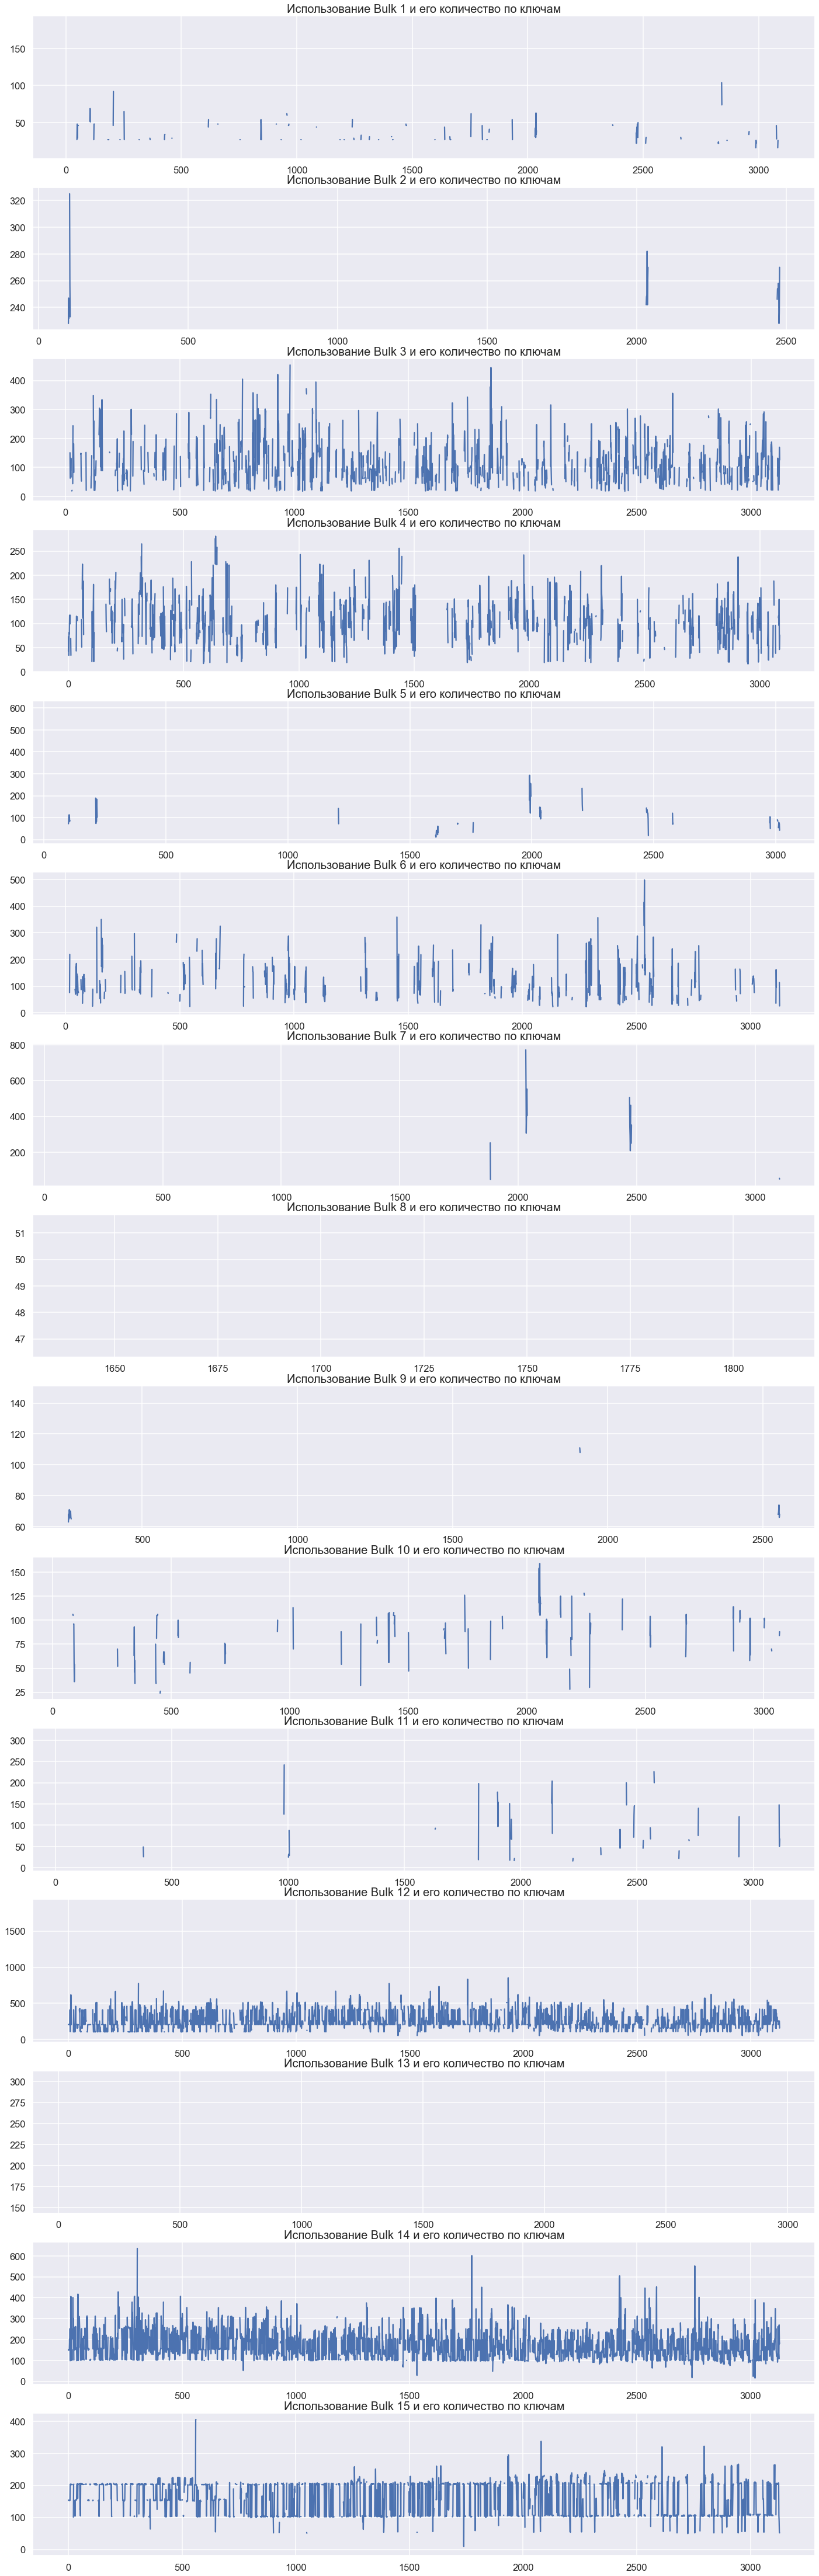

In [17]:
plt.figure(figsize=(24, 80))  
for i in range(1,16):
    sns.set(context='talk')  
    comuns = "Bulk " + str(i)
    title = 'Использование ' + comuns + ' и его количество по ключам'
    plt.subplot(15, 1, i)
    plt.plot(data_bulk[comuns])
    plt.title(title, fontsize=20)

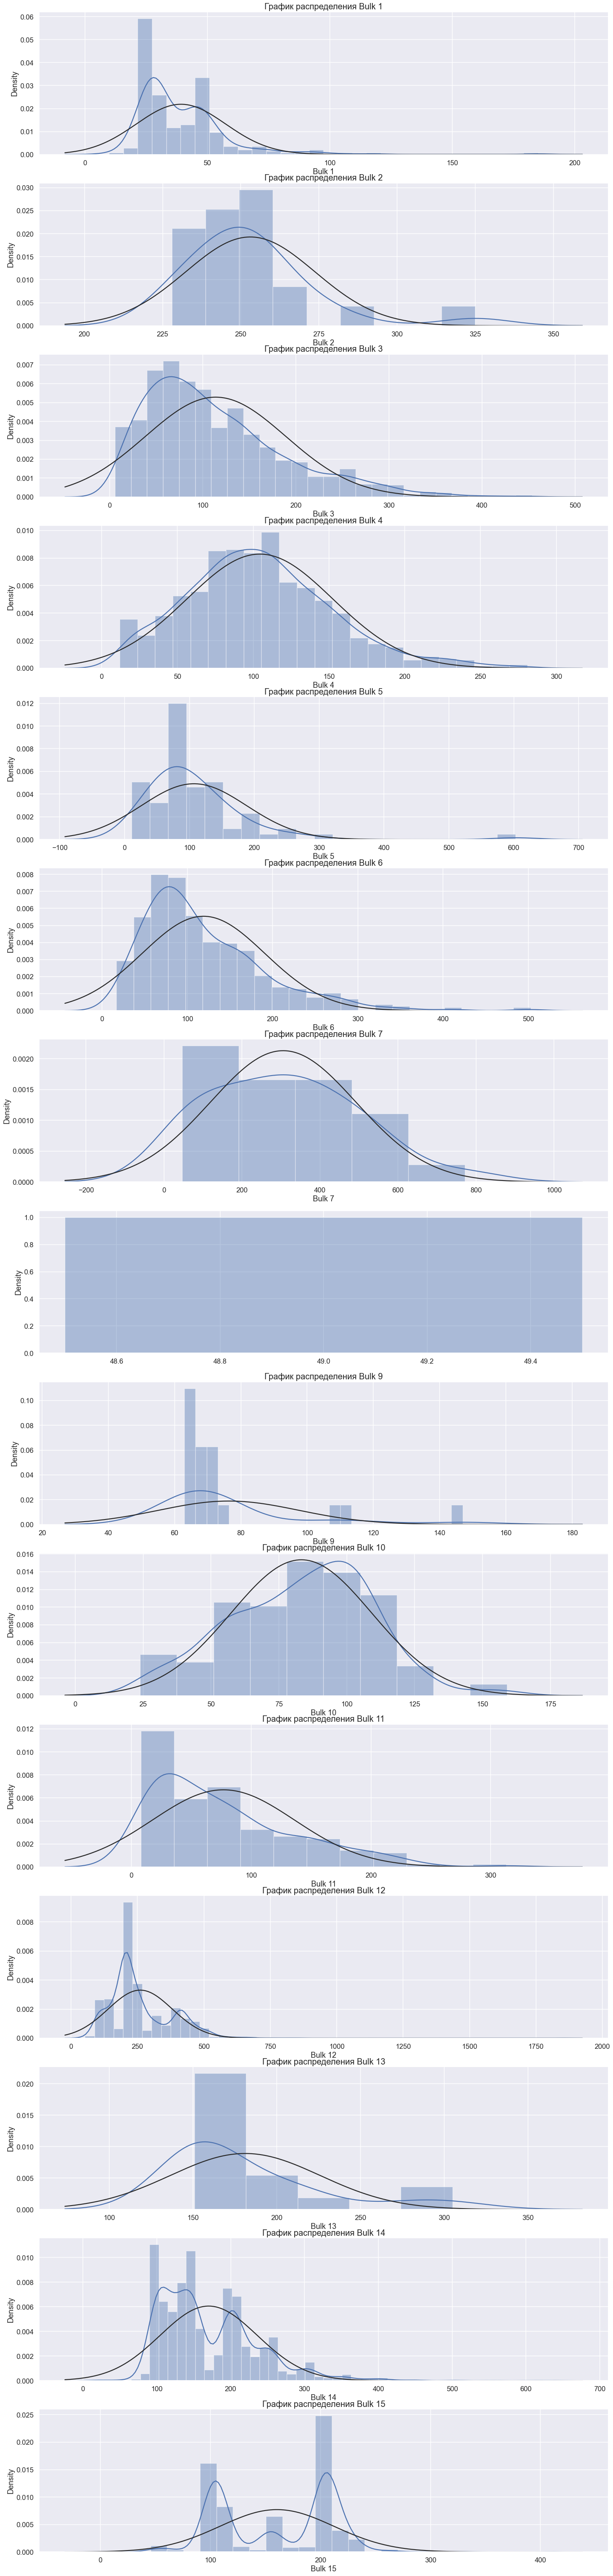

In [18]:
plt.figure(figsize=(24, 110))
for i in range(1,16):
    try:
        sns.set(context='talk')  
        comuns = "Bulk " + str(i)
        title = 'График распределения ' + comuns
        plt.subplot(15, 1, i)
        sns.distplot(data_bulk[comuns], fit=sps.norm)
        plt.title(title, fontsize=20)
    except ValueError:
        continue  

Вывод по DataFrame "data_bulk"
1. В данном датафрейме присутсвуют данные по номеру партии, объём сыпучих материалов. Тип материалов не указан.
2. Большое количество пропусков. Возможно это связано с тем что если в партию не подается сыпучий материал то в данные ничего не записывается.
3. Дубликатов нет.
4. Выведены распределение значенией в признаках. 
5. Количиство подача сыпучих материалов сильно различается от типа. Относительно большое количество подачи сыпучих материалов, больше 1000, Bulk 3, Bulk 4, Bulk 12, Bulk 14, Bulk 15.

### DataFrame "data_bulk_time"

In [19]:
for i in range(1, 16):
    comuns = "Bulk " + str(i)
    data_bulk_time[comuns] = pd.to_datetime(data_bulk_time[comuns])     

In [20]:
data_display(data_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


None

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56


Количество дубликатов 0

Количество уникальных значения столбца key : 3129

Количество уникальных значения столбца Bulk 1 : 253

Количество уникальных значения столбца Bulk 2 : 23

Количество уникальных значения столбца Bulk 3 : 1299

Количество уникальных значения столбца Bulk 4 : 1015

Количество уникальных значения столбца Bulk 5 : 78

Количество уникальных значения столбца Bulk 6 : 577

Количество уникальных значения столбца Bulk 7 : 26

Количество уникальных значения столбца Bulk 8 : 2

Количество уникальных значения столбца Bulk 9 : 20

Количество уникальных значения столбца Bulk 10 : 177

Количество уникальных значения столбца Bulk 11 : 178

Количество уникальных значения столбца Bulk 12 : 2451

Количество уникальных значения столбца Bulk 13 : 19

Количество уникальных значения столбца Bulk 14 : 2807

Количество уникальных значения столбца Bulk 15 : 2249



In [21]:
for i in range(1,16):
    comuns = "Bulk " + str(i)
    print(data_bulk_time[comuns].min(), data_bulk_time[comuns].max())

2019-05-03 17:50:19 2019-08-30 23:01:32
2019-05-07 08:36:19 2019-08-08 17:34:38
2019-05-03 20:13:36 2019-08-31 23:39:11
2019-05-03 11:21:30 2019-08-30 17:36:30
2019-05-07 08:36:19 2019-08-28 09:01:08
2019-05-03 18:52:57 2019-09-01 03:12:40
2019-05-07 11:37:42 2019-08-31 07:22:25
2019-07-05 17:46:11 2019-07-05 17:46:11
2019-05-14 00:04:56 2019-08-11 15:09:33
2019-05-06 01:36:24 2019-08-30 01:30:42
2019-05-05 16:45:05 2019-08-31 16:00:49
2019-05-03 11:03:52 2019-09-01 01:39:41
2019-05-05 00:39:35 2019-08-26 20:31:16
2019-05-03 11:03:52 2019-09-01 04:05:34
2019-05-03 11:03:52 2019-09-01 04:05:34


### Вывод по DataFrame "data_bulk_time"

    1. В данном датафрейме присутсвуют данные по номеру партии, времени подачи сыпучих материалов.
    2. Данные по времени в датафрейме не имеют очивидных выбросов.
    3. Дубликатов нет.
    4. Количество пропусков соответсвут датафрейму data_bulk.

### DataFrame "data_gas"

In [22]:
data_display(data_gas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Количество дубликатов 0

Количество уникальных значения столбца key : 3239

Количество уникальных значения столбца Газ 1 : 3239



Text(0.5, 1.0, 'График оценки распределения Газ 1')

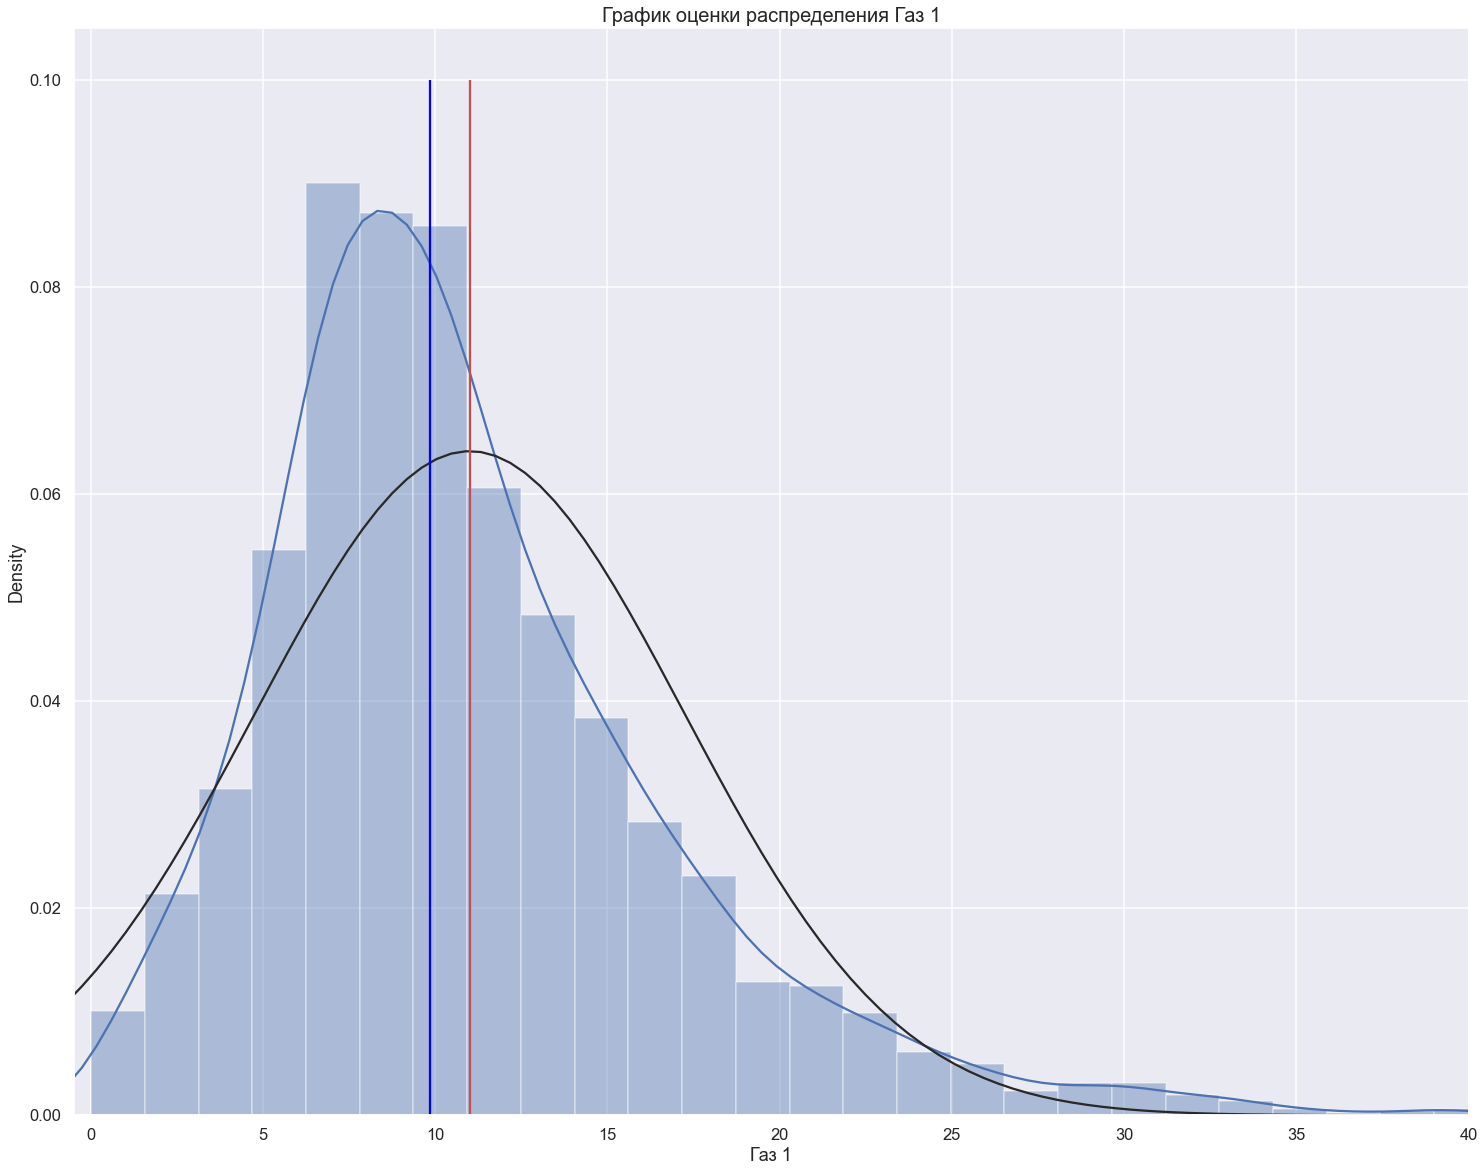

In [23]:
plt.figure(figsize=(25, 20))
sns.distplot(data_gas['Газ 1'], fit=sps.norm)
plt.xlim([-0.5, 40.0])
plt.vlines(data_gas['Газ 1'].mean(),0,0.1,color = 'r')
plt.vlines(data_gas['Газ 1'].median(),0,0.1,color = 'blue')
plt.title('График оценки распределения Газ 1', fontsize=20)

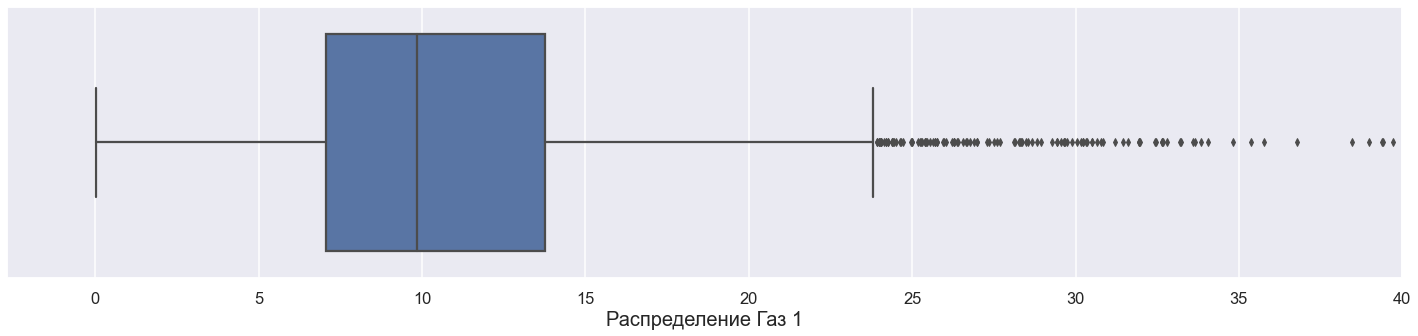

In [24]:
plt.figure(figsize=(25, 5))
sns.boxplot(data_gas['Газ 1'])
plt.xlabel('Распределение Газ 1', fontsize=20)
plt.xlim(-2.7, 40.0)
plt.show()

### Вывод по DataFrame "data_gas"
    1. В данном датафрейме присутсвуют данные по номеру партии и подаче Газа 1.
    2. Пропуски и дубликаты отсутсвуют.
    3. Есть выбросы в признаке 'Газ 1', значения больше 24 едениц.
    4. Распределение значенией признака 'Газ 1' не похожи на нормальное, видно смещение в лево.

### DataFrame "data_temp"

In [25]:
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера']) 

In [26]:
data_display(data_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


None

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Количество дубликатов 0

Количество уникальных значения столбца key : 3216

Количество уникальных значения столбца Время замера : 15907

Количество уникальных значения столбца Температура : 176



Text(0.5, 1.0, 'График оценки распределения Температура')

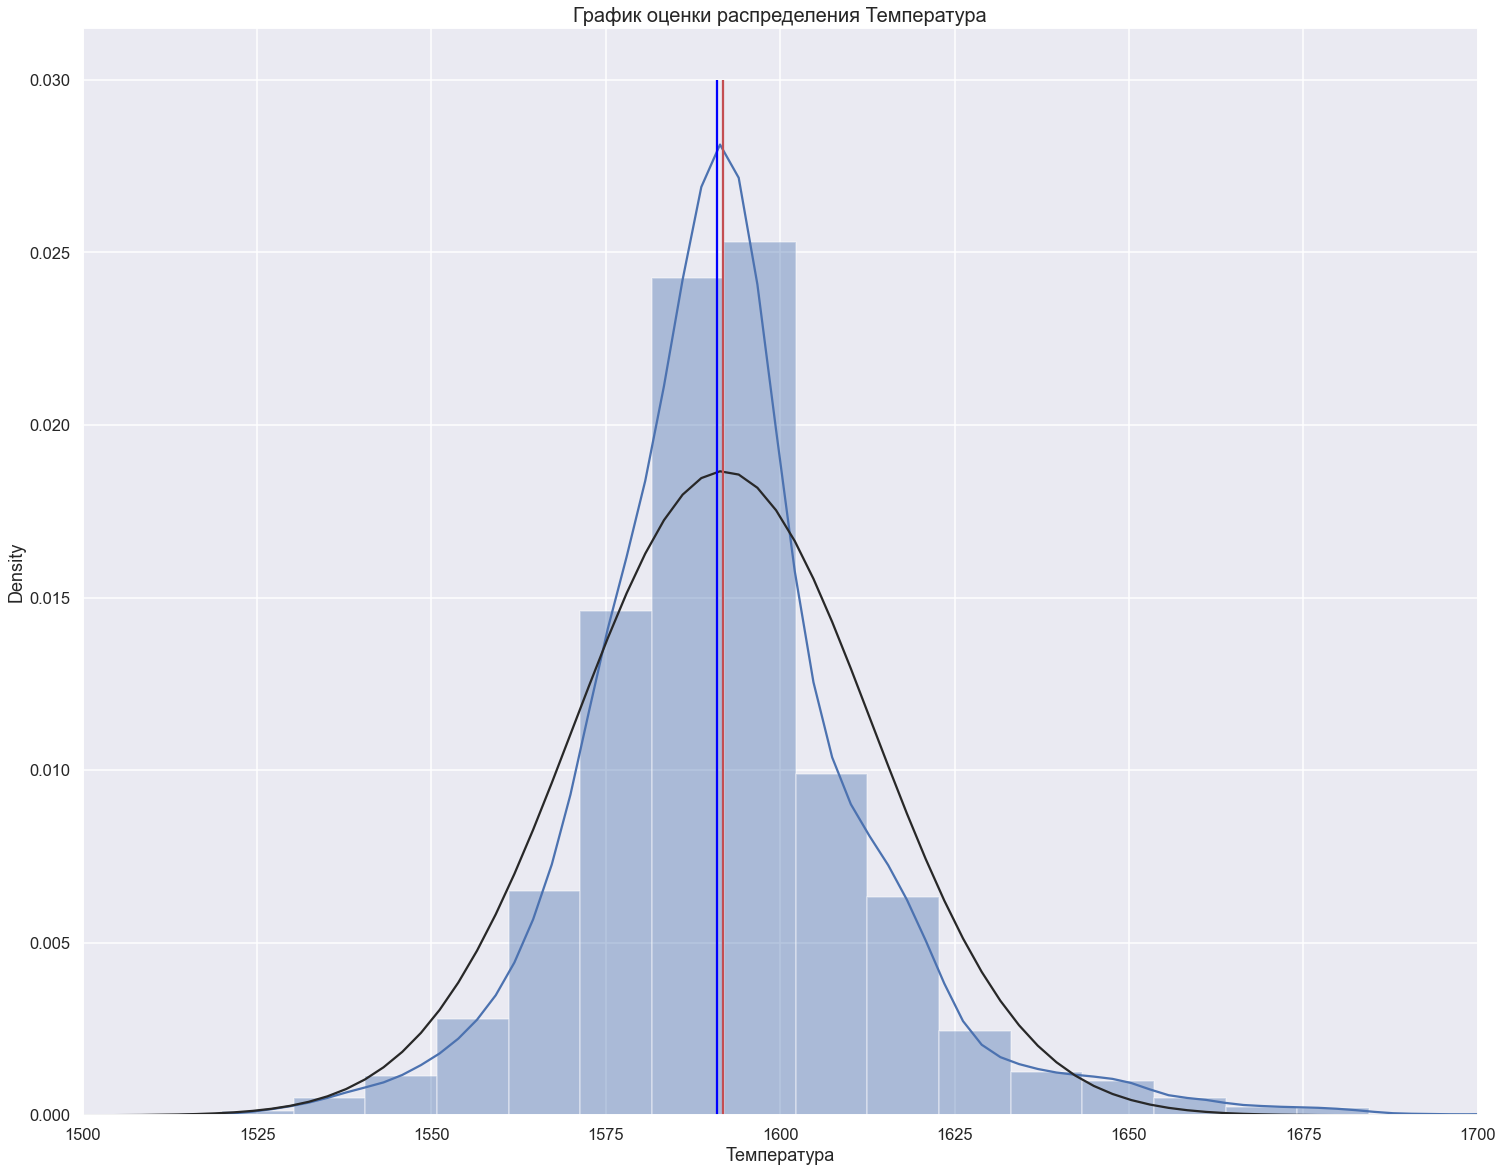

In [27]:
plt.figure(figsize=(25, 20))
sns.distplot(data_temp['Температура'], fit=sps.norm)
plt.xlim([1500.0, 1700])
plt.vlines(data_temp['Температура'].mean(),0,0.03,color = 'r')
plt.vlines(data_temp['Температура'].median(),0,0.03,color = 'blue')
plt.title('График оценки распределения Температура', fontsize=20)

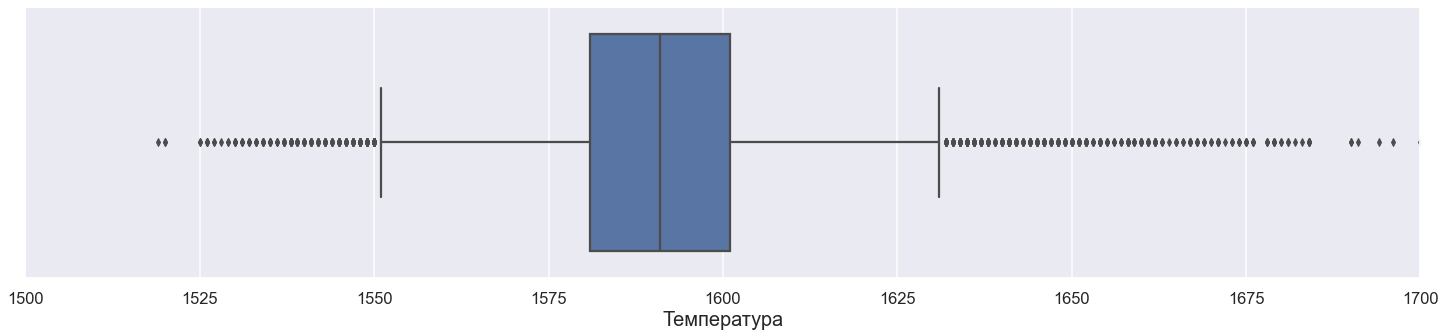

In [28]:
plt.figure(figsize=(25, 5))
sns.boxplot(data_temp['Температура'])
plt.xlabel('Температура', fontsize=20)
plt.xlim(1500.0, 1700.0)
plt.show()

Text(0.5, 1.0, 'Распределение количества измерений температуры по ключам')

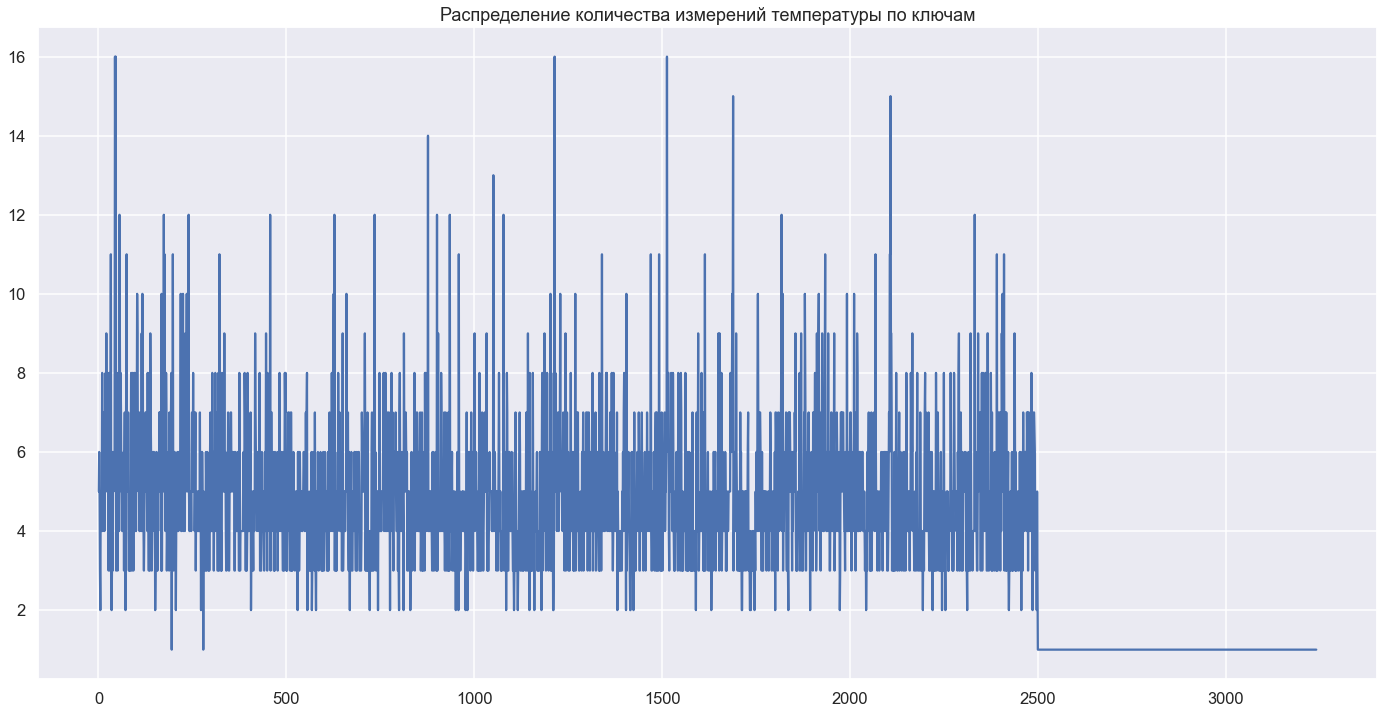

In [29]:
plt.figure(figsize=(24, 12))
plt.plot(data_temp.groupby(by='key', dropna=False)['Температура'].count())
plt.title('Распределение количества измерений температуры по ключам')

Text(0.5, 1.0, 'Темпернатура и ключ')

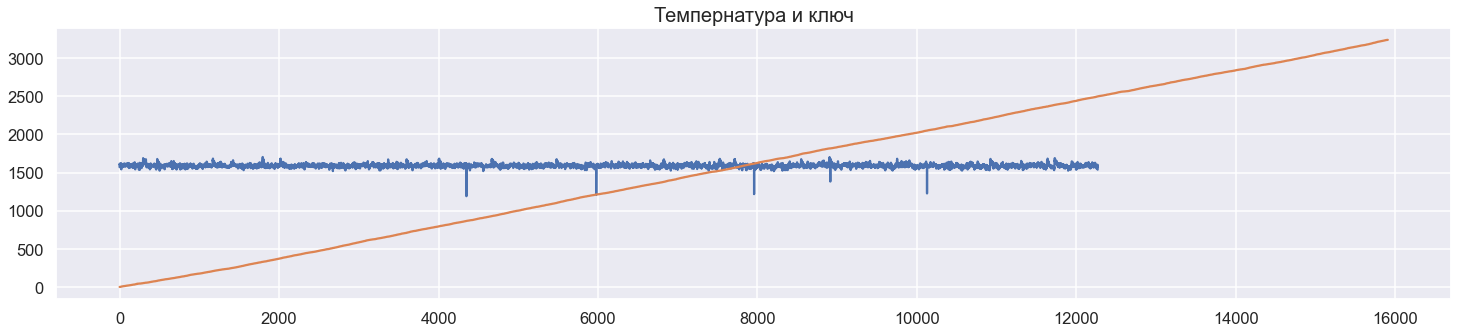

In [30]:
#plt.plot(data_temp['Время замера'])
plt.figure(figsize=(25, 5))
plt.plot(data_temp['Температура'])
plt.plot(data_temp['key'])
plt.title('Темпернатура и ключ', fontsize=20)

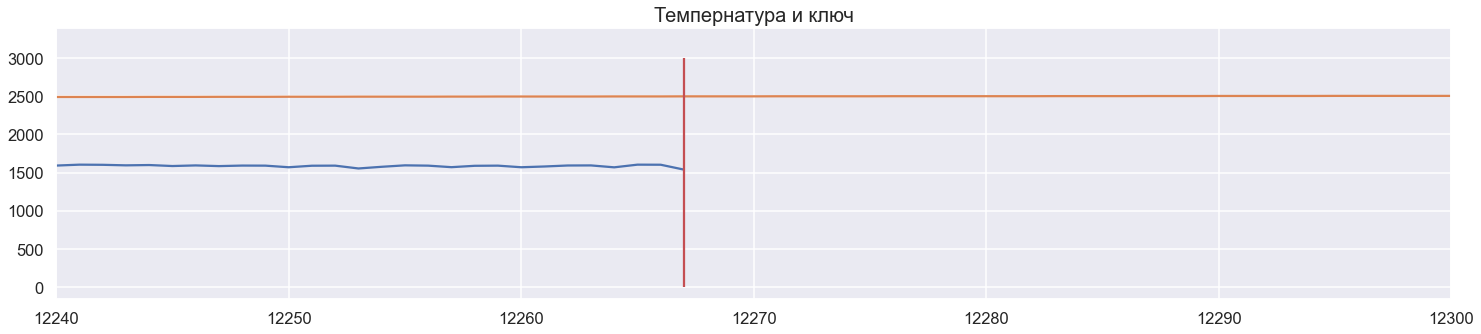

In [31]:
plt.figure(figsize=(25, 5))
plt.plot(data_temp['Температура'])
plt.plot(data_temp['key'])
plt.title('Темпернатура и ключ', fontsize=20)
plt.xlim([12240, 12300])
plt.vlines(data_temp[data_temp['key'] == 2500].index[0],0,3000.0,color = 'r')

### Вывод по DataFrame "data_temp"
    1. В данном датафрейме присутсвуют данные по номеру партии, времени замера и значении температуры.
    2. Большое количество пропусков в значении температуры, характерно что нет значений температуры при значениях ключа больше 2500.
    3. Выведены распределение значения температуры. Распределение похоже на нормальное.  

### DataFrame "data_wire"

In [32]:
data_display(data_wire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество дубликатов 0

Количество уникальных значения столбца key : 3081

Количество уникальных значения столбца Wire 1 : 2252

Количество уникальных значения столбца Wire 2 : 714

Количество уникальных значения столбца Wire 3 : 57

Количество уникальных значения столбца Wire 4 : 15

Количество уникальных значения столбца Wire 5 : 2

Количество уникальных значения столбца Wire 6 : 70

Количество уникальных значения столбца Wire 7 : 11

Количество уникальных значения столбца Wire 8 : 14

Количество уникальных значения столбца Wire 9 : 26



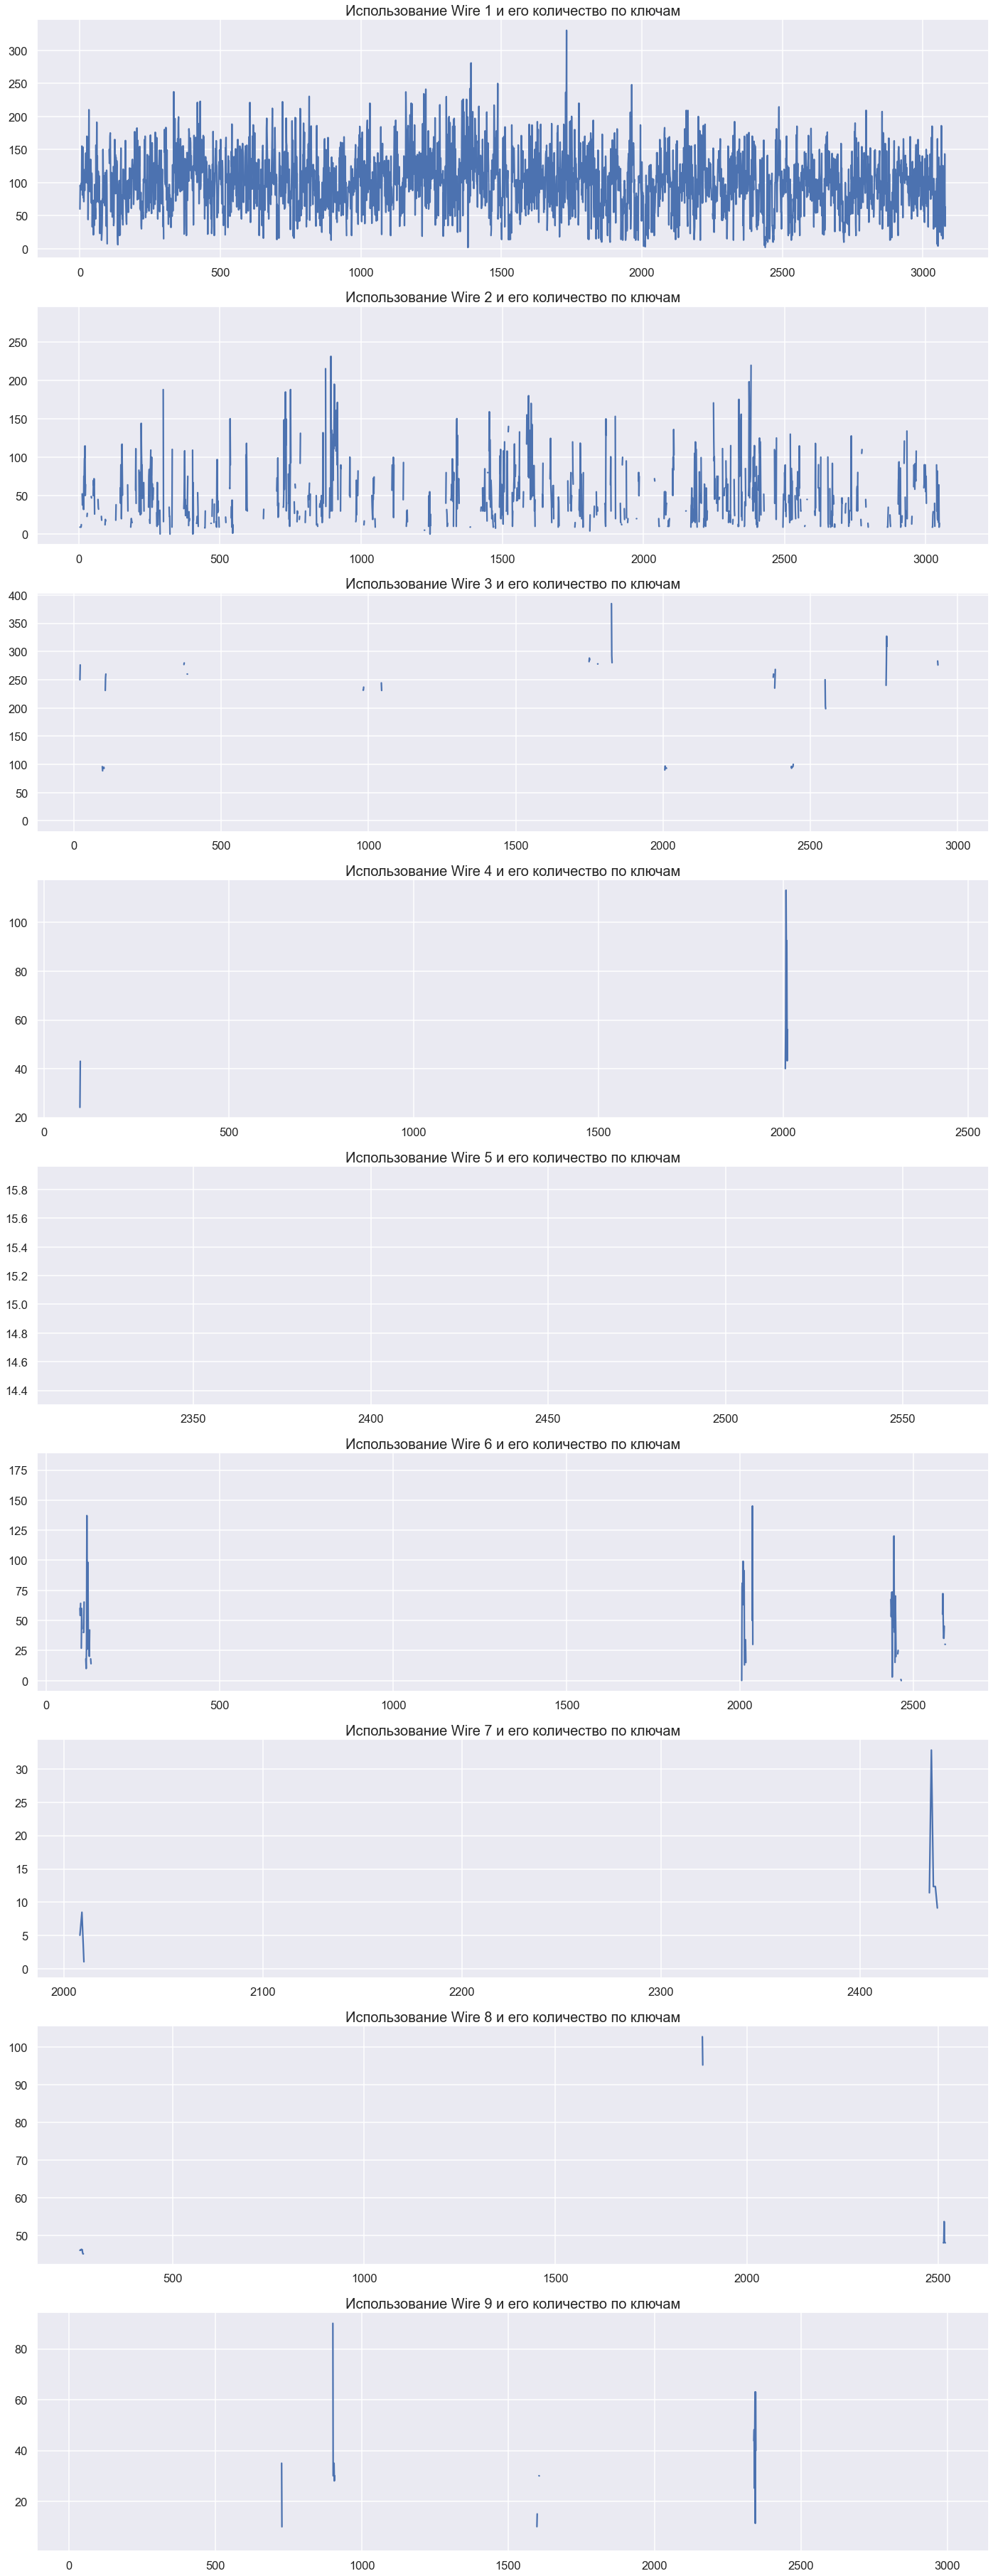

In [33]:
plt.figure(figsize=(24, 110))
for i in range(1,10):
    sns.set(context='talk')  
    comuns = "Wire " + str(i)
    title = 'Использование ' + comuns + ' и его количество по ключам'
    plt.subplot(15, 1, i)
    plt.plot(data_wire[comuns])
    plt.title(title, fontsize=20)

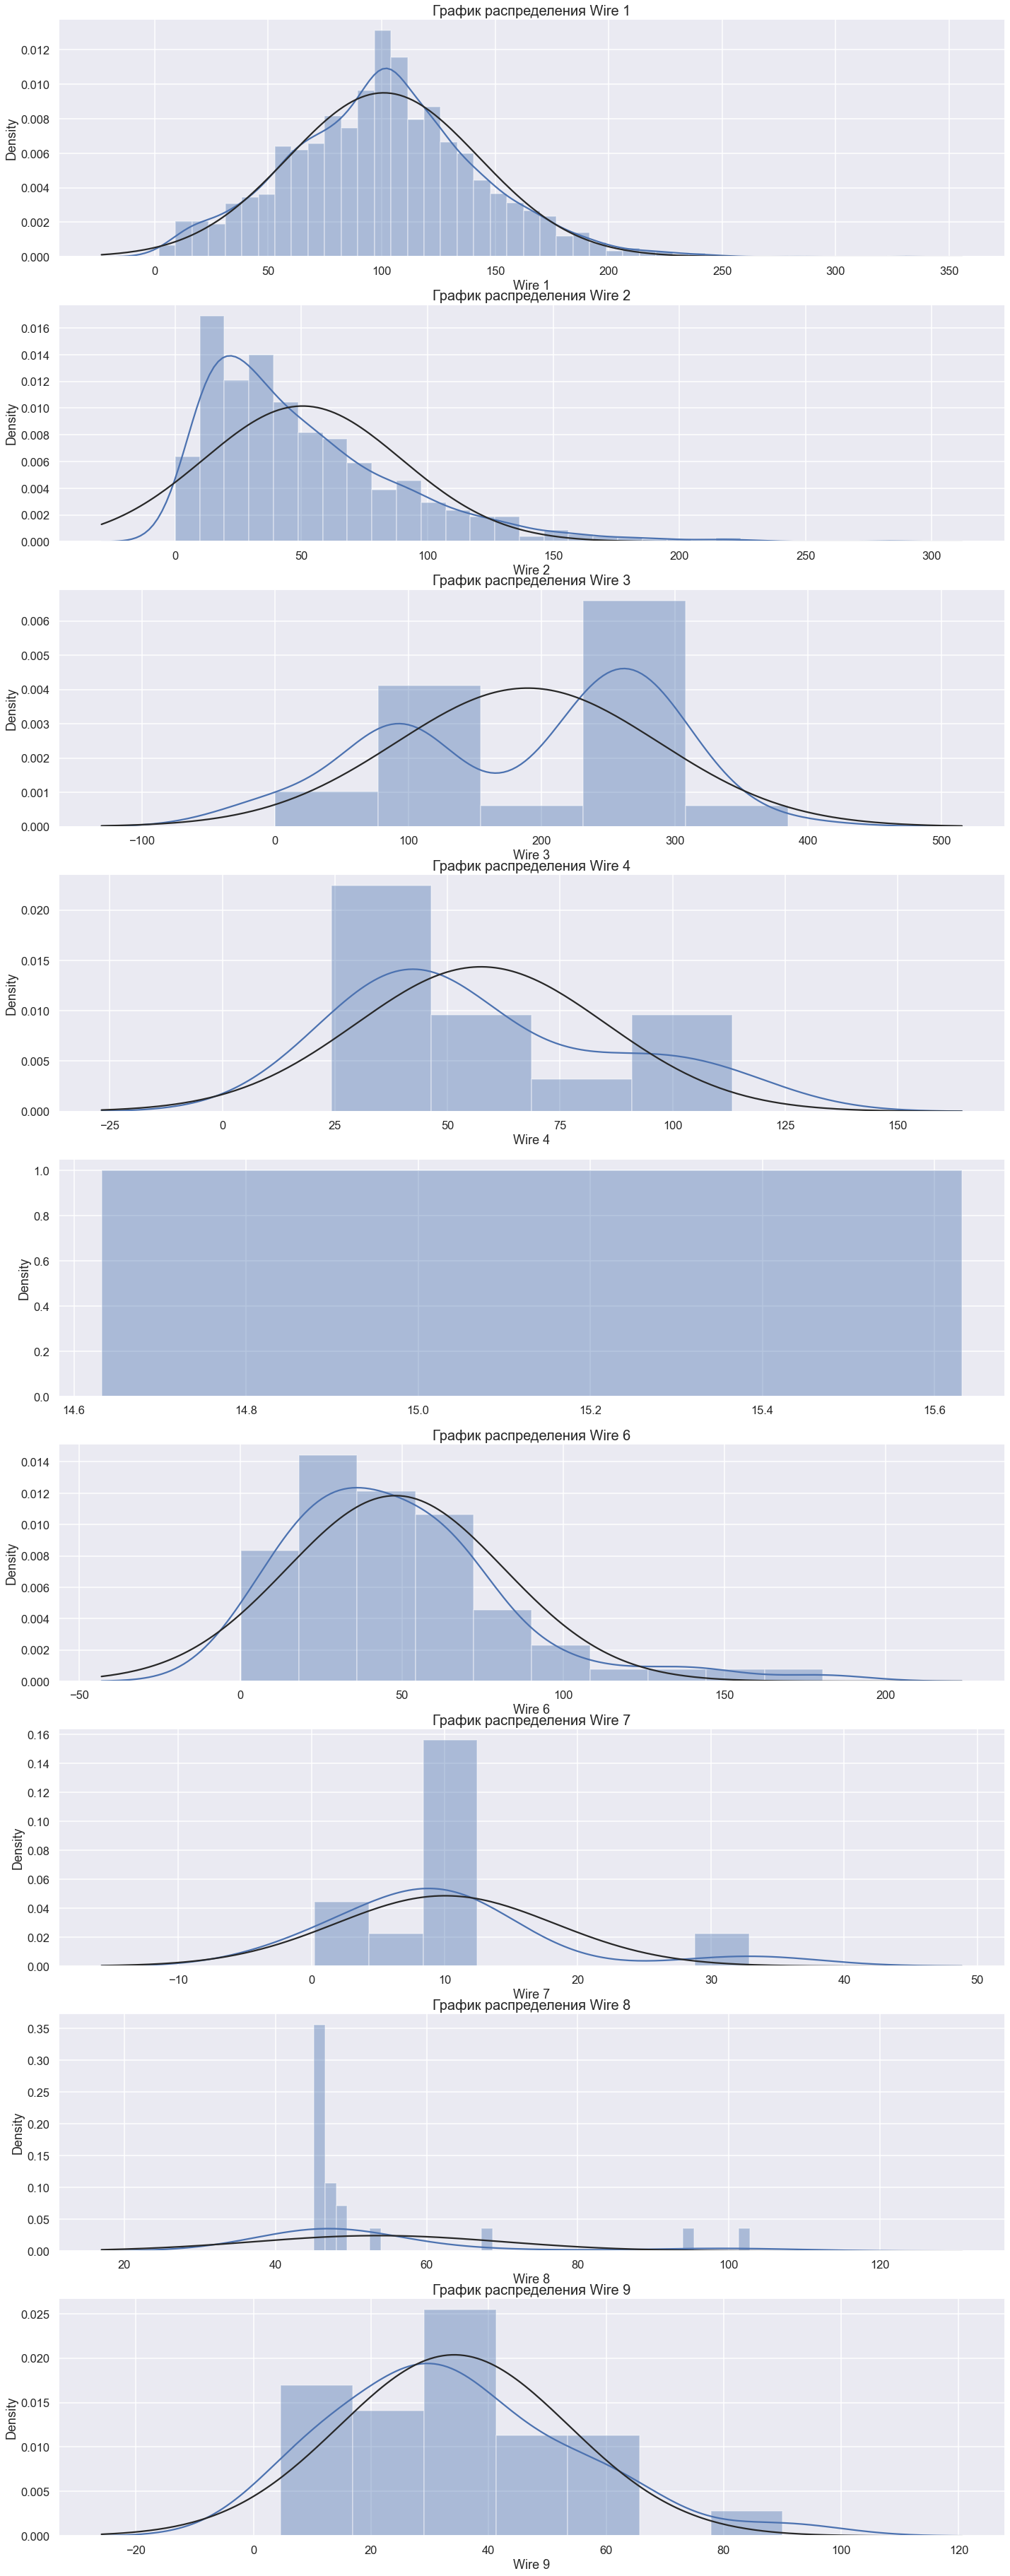

In [34]:
plt.figure(figsize=(24, 110))
for i in range(1,10):
    try:
        sns.set(context='talk')  
        comuns = "Wire " + str(i)
        title = 'График распределения ' + comuns
        plt.subplot(15, 1, i)
        sns.distplot(data_wire[comuns], fit=sps.norm)
        plt.title(title, fontsize=20)
    except ValueError:
        continue  

Вывод по DataFrame "data_wire"
1. В данном датафрейме присутсвуют данные по номеру партии, объём проволочных материалов. Тип материалов не указан.
2. Большое количество пропусков. Возможно это связано с тем что если в партию не подается проволочный материал, то в данные ничего не записывается.
3. Выведены распределение значенией в признаках. Распределение признака Wire 1 похоже на нормальное.
4. Количиство подача сыпучих материалов сильно различается от типа. Относительно большое количество подачи проволочных материалов, больше 1000, Wire 1, Wire 2.

### DataFrame "data_wire_time"

In [35]:
for i in range(1,10):
    comuns = "Wire " + str(i)
    data_wire_time[comuns] = pd.to_datetime(data_wire_time[comuns])    

In [36]:
data_display(data_wire_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


Количество дубликатов 0

Количество уникальных значения столбца key : 3081

Количество уникальных значения столбца Wire 1 : 3056

Количество уникальных значения столбца Wire 2 : 1080

Количество уникальных значения столбца Wire 3 : 64

Количество уникальных значения столбца Wire 4 : 15

Количество уникальных значения столбца Wire 5 : 2

Количество уникальных значения столбца Wire 6 : 74

Количество уникальных значения столбца Wire 7 : 12

Количество уникальных значения столбца Wire 8 : 20

Количество уникальных значения столбца Wire 9 : 30



In [37]:
for i in range(1,10):
    comuns = "Wire " + str(i)
    print(data_wire_time[comuns].min(), data_wire_time[comuns].max())

2019-05-03 11:11:41 2019-09-01 04:16:01
2019-05-03 13:32:06 2019-08-31 18:50:15
2019-05-04 04:47:53 2019-08-28 02:11:18
2019-05-07 08:48:23 2019-08-08 12:03:12
2019-08-08 16:01:07 2019-08-08 16:01:07
2019-05-07 08:37:20 2019-08-14 00:59:11
2019-07-23 12:08:44 2019-08-08 18:27:34
2019-05-14 00:03:32 2019-08-11 15:09:29
2019-05-04 16:09:11 2019-08-29 03:51:31


### Вывод по DataFrame "data_wire_time"

    1. В данном датафрейме присутсвуют данные по номеру партии, времени подачи проволочных материалов. Тип материалов не указан.
    2. Данные по времени в датафрейме не имеют очивидных выбросов. 
    3. Пропусков нет.
    4. Количество пропусков соответсвут датафрейму data_wire.

## 3. Подготовка данных.

### 3.1 Приведение данных и датафреймов к принятому типу и виду. 

In [38]:
def lowerslesh(data):
    data.rename(columns=str.lower, inplace = True)
    data = data.rename(columns=lambda col: col.replace(" ", "_"))
    return data

In [39]:
data_bulk = lowerslesh(data_bulk)
data_bulk_time = lowerslesh(data_bulk_time)
data_wire = lowerslesh(data_wire)
data_wire_time = lowerslesh(data_wire_time)

In [40]:
data_arc.rename(columns={'Начало нагрева дугой': 'start_arc_heating', 'Конец нагрева дугой': 'stop_arc_heating',
                         'Активная мощность': 'active_power', 'Реактивная мощность': 'reactive_power'}, inplace=True)
data_gas.rename(columns={'Газ 1': 'gas'}, inplace=True)
data_temp.rename(columns={'Время замера': 'measurement_time', 'Температура': 'temperature'}, inplace=True)

### 3.2 Удаление и заполнение пропусков.

In [41]:
data_bulk.fillna(0, inplace = True)

In [42]:
data_wire.fillna(0, inplace = True)

### 3.3 Удаление ненужных признаков.

In [43]:
del(data_bulk_time)
del(data_wire_time)

In [44]:
data_arc[data_arc['key'] == int(data_arc['key'][data_arc['reactive_power'] < -715.0])]

,key,start_arc_heating,stop_arc_heating,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


In [45]:
data_arc[data_arc['reactive_power'] == -715.504924]

#data_arc.drop([9780], inplace = True)
data_arc = data_arc.query("reactive_power > -715.504924")

In [46]:
data_temp.dropna(inplace=True)

In [47]:
data_temp

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15878,3237,2019-08-31 22:44:04,1569.0
15883,3238,2019-08-31 23:30:31,1584.0
15886,3239,2019-09-01 01:31:47,1598.0
15894,3240,2019-09-01 02:39:01,1617.0


In [48]:
data_temp = data_temp.reset_index(drop=True)

## 3.4 Создание новых признаков.

In [49]:
data_arc['time_arc_heating'] = data_arc['stop_arc_heating'] - data_arc['start_arc_heating']

In [50]:
data_arc['time_arc_heating'] = data_arc['time_arc_heating'] / np.timedelta64(1, 's')

In [51]:
data_arc = data_arc.drop(['stop_arc_heating', 'start_arc_heating'], axis=1)

In [52]:
data_arc = data_arc.reset_index(drop=True)

In [53]:
data_arc['full_power'] = (data_arc['active_power'] ** 2 + data_arc['reactive_power']** 2)** .5

In [54]:
data_arc['energy'] = data_arc['full_power'] * data_arc['time_arc_heating']

In [55]:
data_temp = data_temp.query("temperature >= 1500")

In [56]:
data_temp_count = data_temp.groupby(by = 'key', as_index=False).count()

In [57]:
data_arc

,key,active_power,reactive_power,time_arc_heating,full_power,energy
0,1,0.976059,0.687084,228.0,1.193639,272.149755
1,1,0.805607,0.520285,185.0,0.959010,177.416785
2,1,0.744363,0.498805,172.0,0.896038,154.118502
3,1,1.659363,1.062669,365.0,1.970470,719.221394
4,1,0.692755,0.414397,148.0,0.807239,119.471318
...,...,...,...,...,...,...
14870,3241,0.533670,0.354439,157.0,0.640648,100.581755
14871,3241,0.676604,0.523631,180.0,0.855559,154.000682
14872,3241,0.733899,0.475654,184.0,0.874560,160.919002
14873,3241,0.220694,0.145768,57.0,0.264489,15.075853


In [58]:
data_temp_count = data_temp_count.query("temperature > 1")['key'].tolist()


In [59]:
data_temp = data_temp.query("key in @data_temp_count")

In [60]:
data_temp = data_temp.drop(['measurement_time'], axis=1)

In [61]:
data_temp = data_temp.groupby(by ='key').agg(['first', 'last']).reset_index()

In [62]:
data_temp

key temperature        
                 first    last
0        1      1571.0  1613.0
1        2      1581.0  1602.0
2        3      1596.0  1599.0
3        4      1601.0  1625.0
4        5      1576.0  1602.0
...    ...         ...     ...
2470  2495      1570.0  1591.0
2471  2496      1554.0  1591.0
2472  2497      1571.0  1589.0
2473  2498      1591.0  1594.0
2474  2499      1569.0  1603.0

[2475 rows x 3 columns]

In [63]:
data_temp.columns = data_temp.columns.droplevel()

In [64]:
data_temp.columns = ['key', 'temperature', 'temperature_target']

In [65]:
agg_func_arc = {'active_power': 'mean', 'reactive_power': 'mean', 'time_arc_heating': 'sum', 'full_power': 'mean', 'energy': 'sum' }
data_arc = data_arc.groupby(['key']).agg(agg_func_arc).reset_index()


In [66]:
data_arc

,key,active_power,reactive_power,time_arc_heating,full_power,energy
0,1,0.975629,0.636648,1098.0,1.165279,1442.377754
1,2,0.763150,0.499528,811.0,0.912304,881.233565
2,3,0.505176,0.319815,655.0,0.597907,525.066777
3,4,0.802313,0.515074,741.0,0.953741,796.911309
4,5,0.836793,0.563161,869.0,1.008939,1199.137958
...,...,...,...,...,...,...
3209,3237,0.786493,0.565692,909.0,0.968996,958.336236
3210,3238,0.702176,0.560394,546.0,0.898847,555.867370
3211,3239,0.583344,0.388952,1216.0,0.701485,1013.067719
3212,3240,0.596817,0.496653,839.0,0.778371,729.208940


### 3.4 Объединение датасетов.

In [67]:
# Резервное копирование
data_arc_copy = data_arc.copy()

In [68]:
data_arc_copy = data_arc_copy.set_index('key').join(data_temp.set_index('key'), how = 'inner').reset_index()

In [69]:
data_arc_copy = data_arc_copy.set_index('key').join(data_bulk.set_index('key'), how = 'inner').reset_index()

In [70]:
data_arc_copy = data_arc_copy.set_index('key').join(data_wire.set_index('key'), how = 'inner').reset_index()

In [71]:
data_arc_copy = data_arc_copy.set_index('key').join(data_gas.set_index('key'), how = 'inner').reset_index()

In [72]:
data_arc_copy.describe()

,key,active_power,reactive_power,time_arc_heating,full_power,energy,temperature,temperature_target,bulk_1,bulk_2,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,...,2329.000000,2329.000000,2329.000000,2329.000000,2329.0,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,1251.832546,0.669044,0.499276,807.600687,0.836618,902.899819,1587.386003,1593.365393,3.427651,1.422499,...,102.443601,17.609859,3.234916,0.306550,0.0,0.978820,0.006361,0.311311,0.317113,11.375600
std,714.762400,0.196943,0.147383,340.897332,0.242350,650.783807,23.619841,11.200915,12.412132,19.082119,...,43.539993,33.624771,27.942871,4.757746,0.0,8.693299,0.205705,4.402707,3.456561,6.392041
min,1.000000,0.186226,0.130062,57.000000,0.228541,15.158096,1519.000000,1541.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008399
25%,630.000000,0.526430,0.392506,581.000000,0.659957,465.235480,1571.000000,1587.000000,0.000000,0.000000,...,73.207679,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.282948
50%,1255.000000,0.644404,0.487685,778.000000,0.815558,767.817794,1587.000000,1593.000000,0.000000,0.000000,...,101.119201,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,10.100950
75%,1868.000000,0.792065,0.592351,993.000000,0.986384,1165.650557,1603.000000,1598.000000,0.000000,0.000000,...,128.091599,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,14.216688
max,2499.000000,1.421416,1.134983,4189.000000,1.796257,10630.980668,1660.000000,1653.000000,185.000000,325.000000,...,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600,77.995040


In [73]:
data_full = data_arc_copy.drop(['wire_5'], axis=1)

In [74]:
data_full

,key,active_power,reactive_power,time_arc_heating,full_power,energy,temperature,temperature_target,bulk_1,bulk_2,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas
0,1,0.975629,0.636648,1098.0,1.165279,1442.377754,1571.0,1613.0,0.0,0.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,2,0.763150,0.499528,811.0,0.912304,881.233565,1581.0,1602.0,0.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,3,0.505176,0.319815,655.0,0.597907,525.066777,1596.0,1599.0,0.0,0.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,4,0.802313,0.515074,741.0,0.953741,796.911309,1601.0,1625.0,0.0,0.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,5,0.836793,0.563161,869.0,1.008939,1199.137958,1576.0,1602.0,0.0,0.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,0.802673,0.590194,723.0,0.996717,778.818234,1570.0,1591.0,0.0,0.0,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,7.125735
2325,2496,0.700511,0.468364,940.0,0.842839,875.261419,1554.0,1591.0,0.0,0.0,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,9.412616
2326,2497,0.737460,0.617090,569.0,0.961672,556.930349,1571.0,1589.0,0.0,0.0,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,6.271699
2327,2498,0.681745,0.471086,750.0,0.828750,767.817794,1591.0,1594.0,0.0,0.0,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,14.953657


### 3.4 Проверка корреляции.

<AxesSubplot:>

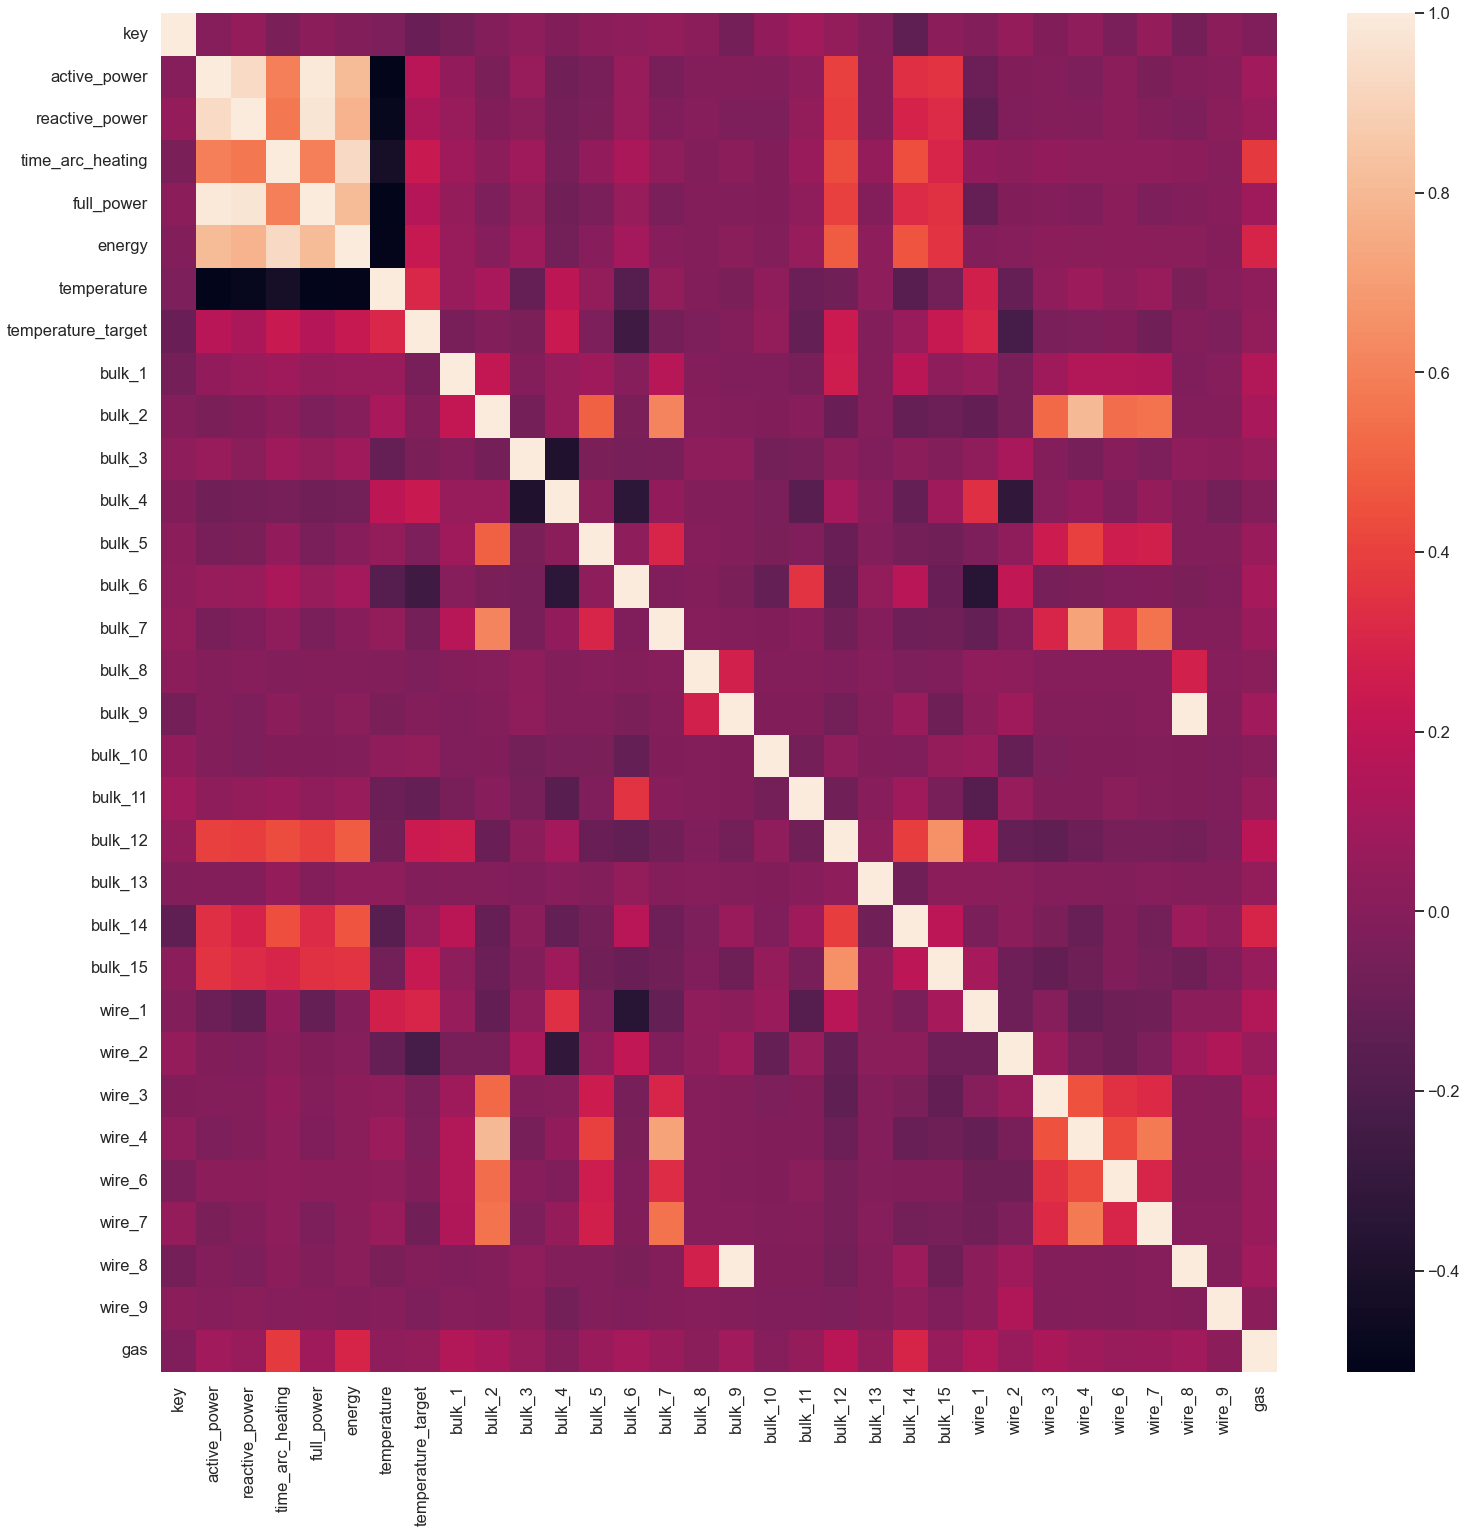

In [75]:
plt.figure(figsize=(25, 25))
sns.heatmap(data_full.corr(method='spearman', min_periods=1))

In [76]:
display(data_full.corr(method='spearman', min_periods=3))

,key,active_power,reactive_power,time_arc_heating,full_power,energy,temperature,temperature_target,bulk_1,bulk_2,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas
key,1.000000,-0.000053,0.052315,-0.035845,0.021022,-0.014118,-0.029093,-0.102895,-0.062547,-0.006284,...,0.024033,-0.015447,0.049762,-0.019851,0.033779,-0.044879,0.049895,-0.061899,0.022813,-0.027278
active_power,-0.000053,1.000000,0.933526,0.595538,0.987933,0.805962,-0.512737,0.178374,0.042403,-0.039563,...,0.354409,-0.098940,-0.018274,-0.007760,-0.028971,0.013754,-0.038608,-0.005094,0.000730,0.092633
reactive_power,0.052315,0.933526,1.000000,0.569106,0.976089,0.776458,-0.485756,0.127057,0.062620,-0.020932,...,0.325240,-0.135349,-0.025619,-0.008422,-0.011217,0.014546,-0.014807,-0.029309,0.008142,0.061559
time_arc_heating,-0.035845,0.595538,0.569106,1.000000,0.596701,0.925617,-0.418522,0.237297,0.080418,0.020366,...,0.297438,0.042344,0.023416,0.040979,0.025117,0.025209,0.025921,0.016042,-0.000984,0.376136
full_power,0.021022,0.987933,0.976089,0.596701,1.000000,0.808771,-0.511661,0.159230,0.049013,-0.032788,...,0.346048,-0.114594,-0.020859,-0.008485,-0.022317,0.013857,-0.028998,-0.013437,0.003289,0.081526
energy,-0.014118,0.805962,0.776458,0.925617,0.808771,1.000000,-0.503919,0.229022,0.064928,-0.003275,...,0.352400,-0.015174,-0.002239,0.015037,0.008479,0.013334,0.007640,0.010717,-0.005142,0.295872
temperature,-0.029093,-0.512737,-0.485756,-0.418522,-0.511661,-0.503919,1.000000,0.307707,0.065093,0.116093,...,-0.063870,0.270432,-0.111179,0.034221,0.073118,0.029080,0.060862,-0.038169,-0.001279,0.031194
temperature_target,-0.102895,0.178374,0.127057,0.237297,0.159230,0.229022,0.307707,1.000000,-0.046423,-0.012554,...,0.226705,0.298326,-0.234445,-0.040835,-0.031570,-0.018795,-0.071735,-0.008315,-0.031852,0.042863
bulk_1,-0.062547,0.042403,0.062620,0.080418,0.049013,0.064928,0.065093,-0.046423,1.000000,0.210876,...,0.026548,0.055883,-0.046566,0.081802,0.152820,0.152142,0.138328,-0.022871,0.000237,0.154543
bulk_2,-0.006284,-0.039563,-0.020932,0.020366,-0.032788,-0.003275,0.116093,-0.012554,0.210876,1.000000,...,-0.095682,-0.127507,-0.053139,0.524490,0.799772,0.538251,0.554519,-0.005613,-0.007645,0.113916


#### По тепловой карте видна сильная  кореляция 'active_power', 'reactive_power' с 'full_power', 'time_arc_heating' с 'energy' и 'wire_8' с 'bulk_1'. Под сильной корреляцией приняли значения больше. по модулю 0.8.  Это может привести к неправильному обучению моделей в частности линейной регрессии. Поэтому для линейных моделей признаки 'active_power', 'reactive_power', 'time_arc_heating', 'wire_8' и 'energy' будут удалены.

 ## 4. Обучение моделей.

 ### 4.1 Создание обучающего и тестового датасета.

In [77]:
df_train, df_test = train_test_split(data_full, test_size=0.25, random_state=190922)

features_train = df_train.drop(['temperature_target'], axis=1)
target_train = df_train['temperature_target']

features_test = df_test.drop(['temperature_target'], axis=1)
target_test = df_test['temperature_target']

In [78]:
data_full.describe()

,key,active_power,reactive_power,time_arc_heating,full_power,energy,temperature,temperature_target,bulk_1,bulk_2,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,...,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,1251.832546,0.669044,0.499276,807.600687,0.836618,902.899819,1587.386003,1593.365393,3.427651,1.422499,...,119.952769,102.443601,17.609859,3.234916,0.306550,0.978820,0.006361,0.311311,0.317113,11.375600
std,714.762400,0.196943,0.147383,340.897332,0.242350,650.783807,23.619841,11.200915,12.412132,19.082119,...,84.640443,43.539993,33.624771,27.942871,4.757746,8.693299,0.205705,4.402707,3.456561,6.392041
min,1.000000,0.186226,0.130062,57.000000,0.228541,15.158096,1519.000000,1541.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399
25%,630.000000,0.526430,0.392506,581.000000,0.659957,465.235480,1571.000000,1587.000000,0.000000,0.000000,...,0.000000,73.207679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.282948
50%,1255.000000,0.644404,0.487685,778.000000,0.815558,767.817794,1587.000000,1593.000000,0.000000,0.000000,...,107.000000,101.119201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.100950
75%,1868.000000,0.792065,0.592351,993.000000,0.986384,1165.650557,1603.000000,1598.000000,0.000000,0.000000,...,204.000000,128.091599,23.102560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.216688
max,2499.000000,1.421416,1.134983,4189.000000,1.796257,10630.980668,1660.000000,1653.000000,185.000000,325.000000,...,405.000000,330.314424,282.780152,385.008668,113.231044,180.454575,8.490040,102.762401,62.025600,77.995040


### 4.2 Линейная регрессия

In [79]:
#Избавляемся от мультиколиниарности
features_train_ln = features_train.drop(['key', 'active_power', 'reactive_power',
                                         'time_arc_heating', 'energy', 'wire_8'], axis=1)

In [80]:
features_test_ln = features_test.drop(['key', 'active_power', 'reactive_power',
                                       'time_arc_heating', 'energy', 'wire_8'], axis=1)

In [81]:
features_train = features_train.drop(['key'], axis=1)

In [82]:
features_test = features_test.drop(['key'], axis=1)

<AxesSubplot:>

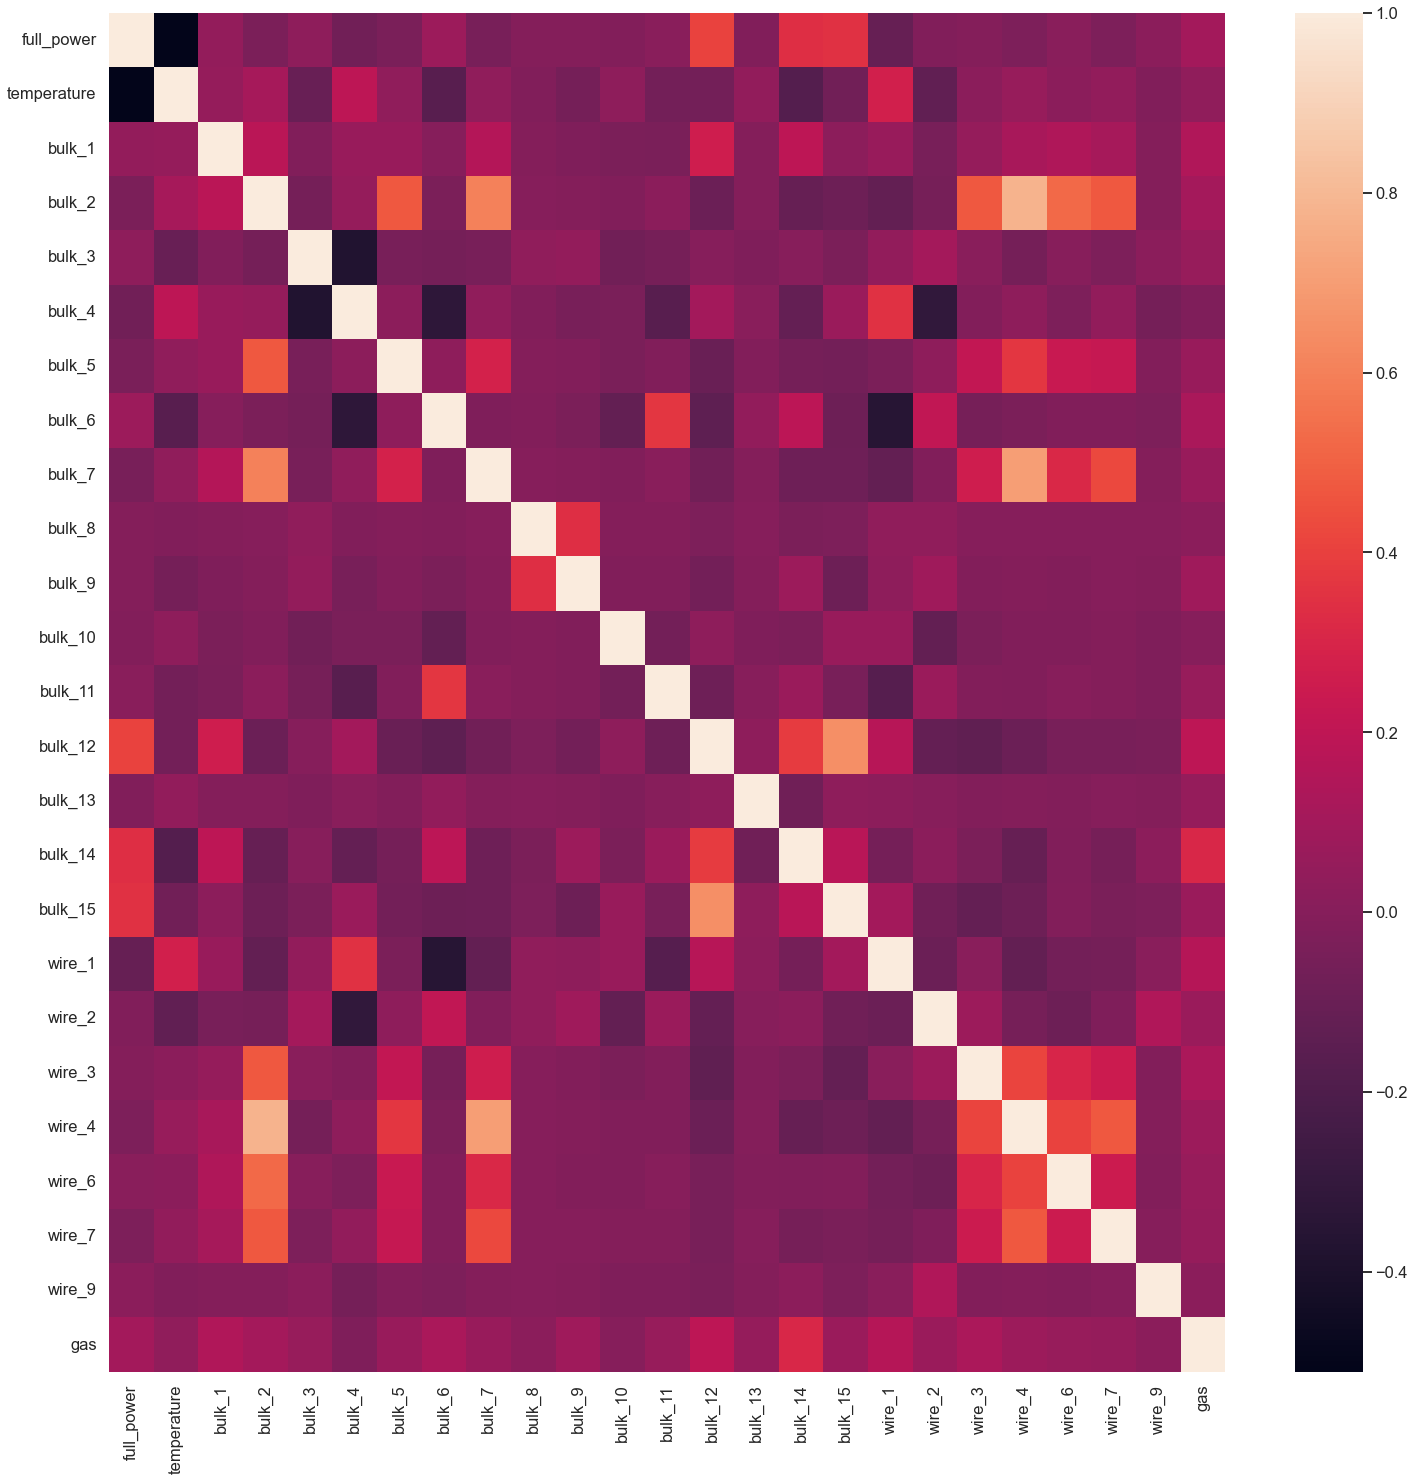

In [83]:
plt.figure(figsize=(25, 25))
sns.heatmap(features_train_ln.corr(method='spearman', min_periods=1))

In [84]:
features_test_ln

,full_power,temperature,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,gas
169,0.659957,1606.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,...,0.0,0.0,78.143516,30.110081,0.0,0.0,0.000000,0.0,0.0,10.018175
1989,0.530372,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,126.0,125.099514,0.000000,0.0,0.0,0.000000,0.0,0.0,8.466904
1442,0.483373,1602.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,143.114396,0.000000,0.0,0.0,0.000000,0.0,0.0,10.906515
1979,0.870143,1585.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,...,141.0,137.0,45.121437,0.000000,0.0,0.0,34.011124,0.0,0.0,11.867074
746,1.636980,1573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,0.0,19.047600,0.000000,0.0,0.0,0.000000,0.0,0.0,5.168057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.740349,1591.0,0.0,0.0,0.0,0.0,0.0,137.0,0.0,0.0,...,299.0,204.0,34.304398,0.000000,0.0,0.0,0.000000,0.0,0.0,10.702693
542,1.023493,1570.0,0.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,...,258.0,405.0,151.070404,0.000000,0.0,0.0,0.000000,0.0,0.0,7.581996
956,0.878326,1600.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,...,131.0,159.0,104.083199,0.000000,0.0,0.0,0.000000,0.0,0.0,8.717571
621,0.773291,1603.0,0.0,0.0,0.0,281.0,0.0,0.0,0.0,0.0,...,206.0,154.0,91.400398,0.000000,0.0,0.0,0.000000,0.0,0.0,20.644044


In [85]:
# Добавим стандартизацию
features_train_scaler = features_train_ln.copy()
features_test_scaler = features_test_ln.copy()

numeric = features_train_ln.columns.tolist()
scaler = StandardScaler()
scaler.fit(features_train_ln[numeric])

features_train_scaler[numeric] = scaler.transform(features_train_ln[numeric])
features_test_scaler[numeric] = scaler.transform(features_test_ln[numeric])

In [86]:
model = LinearRegression()
scores = cross_val_score(model, features_train_scaler, target_train, cv=3, scoring = 'neg_mean_absolute_error')


In [87]:
print("Значение MAE :", abs(scores.mean()))

Значение MAE : 7.462856210271167


### 4.3 Дерево решений.

In [88]:
model_dtr = DecisionTreeRegressor(random_state=random_state)

In [89]:
GSCV_dtr = GridSearchCV( model_dtr, {
    "max_depth": range (1, 50, 1), 
    }, 
    cv = 3,
    scoring = 'neg_mean_absolute_error')


GSCV_dtr.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=190922),
             param_grid={'max_depth': range(1, 50)},
             scoring='neg_mean_absolute_error')

In [90]:
print("Значение MAE :", abs(GSCV_dtr.best_score_)) 

Значение MAE : 7.338338413400694


In [91]:
print("Значения гиперпараметров:", GSCV_dtr.best_estimator_)

Значения гиперпараметров: DecisionTreeRegressor(max_depth=6, random_state=190922)


### 4.4 Случайный лес

In [92]:
model_rfr = RandomForestRegressor(random_state=random_state)

In [93]:
%%time
GSCV_rfr = GridSearchCV( model_rfr, {
    "max_depth": range (1, 10, 1), 
    "n_estimators" : range (90, 110, 1),
    }, 
    cv = 3,
    scoring = 'neg_mean_absolute_error',
    )


GSCV_rfr.fit(features_train, target_train)

CPU times: total: 3min 7s
Wall time: 3min 8s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=190922),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(90, 110)},
             scoring='neg_mean_absolute_error')

In [94]:
print("Значение MAE :", abs(GSCV_rfr.best_score_))  

Значение MAE : 6.280180997376848


In [95]:
print("Значения гиперпараметров:", GSCV_rfr.best_estimator_)

Значения гиперпараметров: RandomForestRegressor(max_depth=8, n_estimators=107, random_state=190922)


### 4.5 LGBMRegressor

In [96]:
model_lgbm = LGBMRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=random_state)
n_scores = cross_val_score(model_lgbm, features_train, target_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))

MAE: 6.171 (0.404)


In [97]:
GSCV_lgbm = GridSearchCV( model_lgbm, {
    "max_depth": range (1, 11, 1), 
    "n_estimators" : range (90, 111, 1),
    'learning_rate' : [0.01, 0.1, 0.2],
    'num_leaves' : [30, 31, 32]    
    }, 
    cv = 3,
    scoring = 'neg_mean_absolute_error')


GSCV_lgbm.fit(features_train, target_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': range(1, 11),
                         'n_estimators': range(90, 111),
                         'num_leaves': [30, 31, 32]},
             scoring='neg_mean_absolute_error')

In [98]:
print("Значение MAE :", abs(GSCV_lgbm.best_score_))  

Значение MAE : 6.112243729113988


In [99]:
print("Значения гиперпараметров:", GSCV_lgbm.best_estimator_)

Значения гиперпараметров: LGBMRegressor(learning_rate=0.2, max_depth=2, n_estimators=95, num_leaves=30)


### 4.6 Выбор наилучших моделей.

In [100]:
tabledata = [["Модель LinearRegression", abs(scores.mean())],
         ["Модель DecisionTreeRegression", abs(GSCV_dtr.best_score_)],
         ["Модель RandomForestRegressor", abs(GSCV_rfr.best_score_)],
         ["Модель LGBMRegressor", abs(GSCV_lgbm.best_score_)]]

table_result = pd.DataFrame(tabledata, columns=["Название модели","Значение MAE"])


In [101]:
table_result

,Название модели,Значение MAE
0,Модель LinearRegression,7.462856
1,Модель DecisionTreeRegression,7.338338
2,Модель RandomForestRegressor,6.280181
3,Модель LGBMRegressor,6.112244


### 4.7 Обучение наилучшей модели на подобранных гиперпараметрах.

In [102]:
model_lgb = LGBMRegressor(random_state=random_state, boosting_type = 'gbdt', max_depth=2, n_estimators=95, learning_rate=0.2, num_leaves=30)
model_lgb.fit(features_train, target_train)

LGBMRegressor(learning_rate=0.2, max_depth=2, n_estimators=95, num_leaves=30,
              random_state=190922)

### 4.8 Проверка моделей на тестовом датасете.

In [103]:
predictions = model_lgb.predict(features_test)
result = mean_absolute_error(target_test, predictions)
print("Значение MAE :", result)

Значение MAE : 5.995576439500427


### 4.8 Проверка важности признаков.

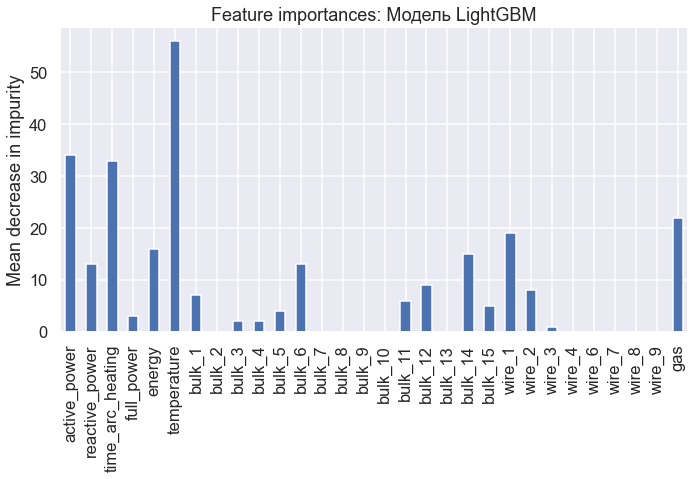

In [104]:
feature_names = features_train.columns 
importances_lgb = model_lgb.feature_importances_
model_importances_lgb = pd.Series(importances_lgb, index=feature_names)

std = np.std([model_lgb.feature_importances_ for tree in str(1000)], axis=0)

fig, ax = plt.subplots(figsize=(10,7))
model_importances_lgb.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances: Модель LightGBM")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

    Из графика видно что основные признаки, влияющие на модель это:
        - первое измерение температуры;
        - полное время нагрева;
        - активная и реактивная мошность;
        - затраченая энерги.
        

 ## 5. Отчет.

## 5.1 Ответы на 4 вопроса задания.

### 5.1.1 Во время выполнения данной работы были выполнены все пункты плана. Отступление было при удаление ненужных признаков и создании новых признаков. Так агригирование по температуре и отбор первой и последней было сделано в разделе создание новых признаков. Также удаление ненужных признаков было выполнено после объединения датасетов. 

### 5.1.2 Первая трудность в данном задание для меня было выбрать первую и последею температуру в  признаков. Втора трудность это использование штатных средст для подбора гиперпараметров, таких как GridSearchCV. Решение искал в ранее выполненых работах и поиском информации в интернете. Затем проверка и доработка кода на данных. 

### 5.1.3 Ключевые шаги это:
    - загрузка и анализ данных;
    - предобработка (очистка от выбросов, удаление пропусков, объединение, создание дополнительных и удаление ненужных признаков);
    - анализ подготовленного датасета, возможно дополнительная предобработка;
    - подбор моделей и обучение в соответствии требованиям;
    - выбор лучшей модели и ее проверка на тестовой выборке;
    - составение отчета.   

### 5.1.4 В данной работе были исползованы следующие модели:
    - модель LinearRegression;
    - модель DecisionTreeRegression;
    - модель RandomForestRegressor;
    - модель LGBMRegressor.
    Итоговоя модель LGBMRegressor. Значение качества MAE = 6.11 на обучающей выборке и MAE = 5.99 на тестововй выборке.    

## 5.2 Список признаков.

### 5.2.1 При обучении использовалдись следующие признаки:
        'active_power', 'reactive_power', 'time_arc_heating', 'full_power',
        'energy', 'temperature', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4',
        'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11',
        'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15', 'wire_1', 'wire_2',
        'wire_3', 'wire_4', 'wire_6', 'wire_7', 'wire_8', 'wire_9', 'gas'.   

### 5.2.2 Описание их предобработки. 
    Предобработка заключалась:
        - удалениие выбросов: 'reactive_power' и 'temperature';
        - удаление пропусков: 'temperature', 'gas'
        - заполнение пропусков:  'bulk_1'...'bulk_15', 'wire_1'...'wire_9';
        - создание новых признаков: 'time_arc_heating', 'full_power','energy'.
        Также использовались признаки которые потом были удалены из датасета 'key', по этому признаку проходило объединение датасетов.
        По признаку 'measurement_time' ('Время замера') проводился отбор первой и последней температуры.
        Также два датасета не использовались, они не несли полезных данных для текущей задачи, это data_bulk_time.csv и data_wire_time.csv.

 ## 5.3 Список гиперпараметров.  

 ### 5.3.1 Лучшей моделью является LGBMRegressor,  список гиперпараметров:
    - learning_rate = 0.2;
    - max_depth = 2;
    - n_estimators = 95;
    - num_leaves = 30;
    - random_state = 190922.